In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
import ROOT
from ROOT import TFile
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [2]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

noTune = False
MECTune = False


#Data and Ext endings currently changed
ending = "Jan19"
#ending = "Dec19_noTune"

In [3]:
if isRun3 == False and isCombined == False:
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    print(nue_nue_allsel_vars_tot)
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)

    ###############################################################

    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")
    

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)

    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot.pop(i)
        nue_mc_weights_tot.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    print(nue_dirt_vars_tot)

    ###############################################################

    #nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")
    #nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")
    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")

    #print(nue_data_vars_tot)

    ###############################################################

    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)

    ###############################################################

    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)
        
    ###############################################################

    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot.pop("Unnamed: 0")
    numu_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_weights_tot[c][0]) > 2:
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][1:]
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][:-1]
            numu_nue_weights_tot[c][0] = list(map(float,numu_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_vars_tot[c][0]) > 2:
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][1:]
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][:-1]
            numu_nue_vars_tot[c][0] = list(map(float,numu_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot.pop(i)
        numu_nue_weights_tot.pop(i) 

    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    #numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")
    #numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")
    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    print(numu_data_vars_tot)
    
elif isRun3 == True and isCombined == False:
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)

    ###############################################################

    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)

    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot.pop(i)
        nue_mc_weights_tot.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    print(nue_dirt_vars_tot)

    ###############################################################

    #nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")
    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot.pop("Unnamed: 0")
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")

    print(nue_data_vars_tot)

    ###############################################################

    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)

    ###############################################################

    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)
        
    ###############################################################

    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot.pop("Unnamed: 0")
    numu_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_weights_tot[c][0]) > 2:
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][1:]
            numu_nue_weights_tot[c][0] = numu_nue_weights_tot[c][0][:-1]
            numu_nue_weights_tot[c][0] = list(map(float,numu_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot.keys():
        if len(numu_nue_vars_tot[c][0]) > 2:
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][1:]
            numu_nue_vars_tot[c][0] = numu_nue_vars_tot[c][0][:-1]
            numu_nue_vars_tot[c][0] = list(map(float,numu_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot.pop(i)
        numu_nue_weights_tot.pop(i) 
        

    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    #numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")
    #numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")
    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    print(numu_data_vars_tot)
    
elif isCombined == True:
    
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run1 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run1 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_weights_tot_run1[c][0]) > 2:
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][1:]
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][:-1]
            nue_nue_allsel_weights_tot_run1[c][0] = list(map(float,nue_nue_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_vars_tot_run1[c][0]) > 2:
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][1:]
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][:-1]
            nue_nue_allsel_vars_tot_run1[c][0] = list(map(float,nue_nue_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run1.pop(i)
        nue_nue_allsel_weights_tot_run1.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run1 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run1 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run1.pop("Unnamed: 0")
    nue_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_weights_tot_run1[c][0]) > 2:
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][1:]
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][:-1]
            nue_mc_weights_tot_run1[c][0] = list(map(float,nue_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_vars_tot_run1[c][0]) > 2:
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][1:]
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][:-1]
            nue_mc_vars_tot_run1[c][0] = list(map(float,nue_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run1.pop(i)
        nue_mc_weights_tot_run1.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run1 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run1= nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run1.pop("Unnamed: 0")
    nue_dirt_weights_tot_run1.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_weights_tot_run1[c][0]) > 2:
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][1:]
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][:-1]
            nue_dirt_weights_tot_run1[c][0] = list(map(float,nue_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_vars_tot_run1[c][0]) > 2:
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][1:]
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][:-1]
            nue_dirt_vars_tot_run1[c][0] = list(map(float,nue_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run1.pop(i)
        nue_dirt_weights_tot_run1.pop(i)

    #print(nue_dirt_vars_tot_run1)

    ###############################################################

    #nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run1 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run1 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run1.pop("Unnamed: 0")
    nue_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    #nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run1 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run1 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run1.pop("Unnamed: 0")
    nue_data_weights_tot_run1.pop("Unnamed: 0")
    

    ###############################################################
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv")
    
    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run1 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run1 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run1.pop("Unnamed: 0")
    
    print(len(nue_nue_sigsel_vars_tot_run1["1"][0]))
    print(len(nue_nue_sigsel_weights_tot_run1["1"][0]))

    poplist = []

    for c in nue_nue_sigsel_weights_tot_run1.keys():
        if len(nue_nue_sigsel_weights_tot_run1[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][1:]
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][:-1]
            nue_nue_sigsel_weights_tot_run1[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_vars_tot_run1[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][1:]
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][:-1]
            nue_nue_sigsel_vars_tot_run1[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run1.pop(i)
        nue_nue_sigsel_weights_tot_run1.pop(i)
     
    #####################################################
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run1 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run1 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_weights_tot_run1[c][0]) > 2:
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][1:]
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][:-1]
            numu_mc_allsel_weights_tot_run1[c][0] = list(map(float,numu_mc_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_vars_tot_run1[c][0]) > 2:
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][1:]
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][:-1]
            numu_mc_allsel_vars_tot_run1[c][0] = list(map(float,numu_mc_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run1.pop(i)
        numu_mc_allsel_weights_tot_run1.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run1 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run1 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_weights_tot_run1[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][1:]
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][:-1]
            numu_mc_sigsel_weights_tot_run1[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_vars_tot_run1[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][1:]
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][:-1]
            numu_mc_sigsel_vars_tot_run1[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run1.pop(i)
        numu_mc_sigsel_weights_tot_run1.pop(i)
    
    ###########################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run1 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run1 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run1.pop("Unnamed: 0")
    numu_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_weights_tot_run1[c][0]) > 2:
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][1:]
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][:-1]
            numu_nue_weights_tot_run1[c][0] = list(map(float,numu_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_vars_tot_run1[c][0]) > 2:
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][1:]
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][:-1]
            numu_nue_vars_tot_run1[c][0] = list(map(float,numu_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run1.pop(i)
        numu_nue_weights_tot_run1.pop(i) 
        

    ###############################################################
    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run1 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run1 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run1.pop("Unnamed: 0")
    numu_dirt_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_weights_tot_run1[c][0]) > 2:
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][1:]
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][:-1]
            numu_dirt_weights_tot_run1[c][0] = list(map(float,numu_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_vars_tot_run1[c][0]) > 2:
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][1:]
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][:-1]
            numu_dirt_vars_tot_run1[c][0] = list(map(float,numu_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run1.pop(i)
        numu_dirt_weights_tot_run1.pop(i) 

    ###############################################################

    #numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run1 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run1 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run1.pop("Unnamed: 0")
    numu_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    #numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run1 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run1 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run1.pop("Unnamed: 0")
    numu_data_weights_tot_run1.pop("Unnamed: 0")

    #print(numu_data_vars_tot)
      
    #########################################################################################
    #########################################################################################
    
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run3 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run3 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_weights_tot_run3[c][0]) > 2:
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][1:]
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][:-1]
            nue_nue_allsel_weights_tot_run3[c][0] = list(map(float,nue_nue_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_vars_tot_run3[c][0]) > 2:
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][1:]
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][:-1]
            nue_nue_allsel_vars_tot_run3[c][0] = list(map(float,nue_nue_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run3.pop(i)
        nue_nue_allsel_weights_tot_run3.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run3 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run3 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run3.pop("Unnamed: 0")
    nue_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_weights_tot_run3[c][0]) > 2:
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][1:]
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][:-1]
            nue_mc_weights_tot_run3[c][0] = list(map(float,nue_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_vars_tot_run3[c][0]) > 2:
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][1:]
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][:-1]
            nue_mc_vars_tot_run3[c][0] = list(map(float,nue_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run3.pop(i)
        nue_mc_weights_tot_run3.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run3 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run3 = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run3.pop("Unnamed: 0")
    nue_dirt_weights_tot_run3.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_weights_tot_run3[c][0]) > 2:
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][1:]
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][:-1]
            nue_dirt_weights_tot_run3[c][0] = list(map(float,nue_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_vars_tot_run3[c][0]) > 2:
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][1:]
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][:-1]
            nue_dirt_vars_tot_run3[c][0] = list(map(float,nue_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run3.pop(i)
        nue_dirt_weights_tot_run3.pop(i)

    #print(nue_dirt_vars_tot)

    ###############################################################

    #nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run3 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run3 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run3.pop("Unnamed: 0")
    nue_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    #nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    

    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run3 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run3 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run3.pop("Unnamed: 0")
    nue_data_weights_tot_run3.pop("Unnamed: 0")
    
    
    ###############################################################
    
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run3 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run3 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_weights_tot_run3[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][1:]
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][:-1]
            nue_nue_sigsel_weights_tot_run3[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_vars_tot_run3[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][1:]
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][:-1]
            nue_nue_sigsel_vars_tot_run3[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run3.pop(i)
        nue_nue_sigsel_weights_tot_run3.pop(i)
    
    
    
    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run3 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run3 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_weights_tot_run3[c][0]) > 2:
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][1:]
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][:-1]
            numu_mc_allsel_weights_tot_run3[c][0] = list(map(float,numu_mc_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_vars_tot_run3[c][0]) > 2:
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][1:]
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][:-1]
            numu_mc_allsel_vars_tot_run3[c][0] = list(map(float,numu_mc_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run3.pop(i)
        numu_mc_allsel_weights_tot_run3.pop(i)
    
    ###############################################################
    
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run3 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run3 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_weights_tot_run3[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][1:]
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][:-1]
            numu_mc_sigsel_weights_tot_run3[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_vars_tot_run3[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][1:]
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][:-1]
            numu_mc_sigsel_vars_tot_run3[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run3.pop(i)
        numu_mc_sigsel_weights_tot_run3.pop(i)
    
    ###############################################################
    
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run3 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run3 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run3.pop("Unnamed: 0")
    numu_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_weights_tot_run3[c][0]) > 2:
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][1:]
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][:-1]
            numu_nue_weights_tot_run3[c][0] = list(map(float,numu_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_vars_tot_run3[c][0]) > 2:
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][1:]
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][:-1]
            numu_nue_vars_tot_run3[c][0] = list(map(float,numu_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run3.pop(i)
        numu_nue_weights_tot_run3.pop(i) 
        


    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run3 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run3 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run3.pop("Unnamed: 0")
    numu_dirt_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_weights_tot_run3[c][0]) > 2:
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][1:]
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][:-1]
            numu_dirt_weights_tot_run3[c][0] = list(map(float,numu_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_vars_tot_run3[c][0]) > 2:
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][1:]
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][:-1]
            numu_dirt_vars_tot_run3[c][0] = list(map(float,numu_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run3.pop(i)
        numu_dirt_weights_tot_run3.pop(i) 

    ###############################################################

    #numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run3 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run3 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run3.pop("Unnamed: 0")
    numu_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    #numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run3 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run3 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run3.pop("Unnamed: 0")
    numu_data_weights_tot_run3.pop("Unnamed: 0")

    #print(numu_data_vars_tot)

    

111870
121822


In [4]:
if isRun3 == False and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])

    print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)


    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])

    print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    print("nue_mc_stat_errs = ", nue_mc_stat_errs)

    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

    print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    print("")
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])

    print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])

    print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    
    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs = list(csv_reader)

    for a in range(len(numu_nue_stat_errs)):
        numu_nue_stat_errs[a] = float(numu_nue_stat_errs[a][0])

    print("numu_nue_stat_errs = ", numu_nue_stat_errs)


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])

    print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)


    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    print("numu_ext_stat_errs = ", numu_ext_stat_errs)
    
elif isRun3 == True and isCombined == False:
    with open('nue_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])

    print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)

    ################################################

    with open('nue_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])

    print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    ################################################

    with open('nue_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    print("nue_mc_stat_errs = ", nue_mc_stat_errs)


    ###################################################

    with open('nue_dirt_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

    print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    print("")
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])

    print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)


    ###################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])

    print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    
    ###################################################

    with open('numu_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs = list(csv_reader)

    for a in range(len(numu_nue_stat_errs)):
        numu_nue_stat_errs[a] = float(numu_nue_stat_errs[a][0])

    print("numu_nue_stat_errs = ", numu_nue_stat_errs)


    ###################################################

    with open('numu_dirt_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])

    print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)


    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    print("numu_ext_stat_errs = ", numu_ext_stat_errs)
    
elif isCombined == True:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run1)):
        nue_nue_sigsel_stat_errs_run1[a] = float(nue_nue_sigsel_stat_errs_run1[a][0])

    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run1)):
        nue_nue_notsigsel_stat_errs_run1[a] = float(nue_nue_notsigsel_stat_errs_run1[a][0])


    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run1)):
        nue_mc_stat_errs_run1[a] = float(nue_mc_stat_errs_run1[a][0])


    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run1)):
        nue_dirt_stat_errs_run1[a] = float(nue_dirt_stat_errs_run1[a][0])

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_Jan19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run1)):
        nue_ext_stat_errs_run1[a] = float(nue_ext_stat_errs_run1[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    #print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run1)):
        numu_mc_sigsel_stat_errs_run1[a] = float(numu_mc_sigsel_stat_errs_run1[a][0])



    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run1)):
        numu_mc_notsigsel_stat_errs_run1[a] = float(numu_mc_notsigsel_stat_errs_run1[a][0])


    ###################################################

    #with open('numu_nue_stat_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_'+ending+'.csv', 'r') as read_obj:
    with open('numu_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:  
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_nue_stat_errs_run1)):
        numu_nue_stat_errs_run1[a] = float(numu_nue_stat_errs_run1[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run1)):
        numu_dirt_stat_errs_run1[a] = float(numu_dirt_stat_errs_run1[a][0])



    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_Jan19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run1)):
        numu_ext_stat_errs_run1[a] = float(numu_ext_stat_errs_run1[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)
##############################################################################################
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run3)):
        nue_nue_sigsel_stat_errs_run3[a] = float(nue_nue_sigsel_stat_errs_run3[a][0])


    ################################################

    with open('nue_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run3)):
        nue_nue_notsigsel_stat_errs_run3[a] = float(nue_nue_notsigsel_stat_errs_run3[a][0])


    ################################################

    with open('nue_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run3)):
        nue_mc_stat_errs_run3[a] = float(nue_mc_stat_errs_run3[a][0])

    ###################################################

    with open('nue_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run3)):
        nue_dirt_stat_errs_run3[a] = float(nue_dirt_stat_errs_run3[a][0])

    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_Jan19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run3)):
        nue_ext_stat_errs_run3[a] = float(nue_ext_stat_errs_run3[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run3)):
        numu_mc_sigsel_stat_errs_run3[a] = float(numu_mc_sigsel_stat_errs_run3[a][0])


    ###################################################

    with open('numu_mc_stat_updated_errs_full_catsel_nopions_angleDiff_usingSelection_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run3)):
        numu_mc_notsigsel_stat_errs_run3[a] = float(numu_mc_notsigsel_stat_errs_run3[a][0])

    
    ###################################################

    with open('numu_nue_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_nue_stat_errs_run3)):
        numu_nue_stat_errs_run3[a] = float(numu_nue_stat_errs_run3[a][0])


    ###################################################

    with open('numu_dirt_stat_errs_updated_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run3)):
        numu_dirt_stat_errs_run3[a] = float(numu_dirt_stat_errs_run3[a][0])


    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_angleDiff_usingSelection_run3_Jan19.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run3)):
        numu_ext_stat_errs_run3[a] = float(numu_ext_stat_errs_run3[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs

In [5]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.empty([len(final_ns), len(final_ns)])
        tempCov.fill(0)
        for n in n_tot_pair:
            for i in range(len(final_ns)):
                for j in range(len(final_ns)):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [6]:
if isRun3 == False and isCombined == False:

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)
    

    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
    
elif isRun3 == True and isCombined == False:

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
    
elif isCombined == True:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx_run1 = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint_run1 = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo_run1 = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx_run1 = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie_run1 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint_run1 = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo_run1 = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx_run1 = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie_run1 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint_run1 = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo_run1 = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx_run1 = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie_run1 = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint_run1 = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo_run1 = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

    
    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx_run1 = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie_run1 = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint_run1 = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo_run1 = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx_run1 = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie_run1 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint_run1 = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo_run1 = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
    
    #################################################################################
    ##################################################################################

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx_run3 = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint_run3 = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo_run3 = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx_run3 = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie_run3 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint_run3 = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo_run3 = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx_run3 = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie_run3 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint_run3 = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo_run3 = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx_run3 = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint_run3 = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo_run3 = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
    
    
    ###########################################################################################

    #############################
    #### numu_nue ################
    #############################
    with open('numu_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_ppfx = list(csv_reader)   

    with open('numu_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_ppfx = list(csv_reader)


    with open('numu_nue_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_genie = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_genie = list(csv_reader)


    with open('numu_nue_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_nue_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ns_geo = list(csv_reader)

    with open('numu_nue_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_nue_final_ncvs_geo = list(csv_reader)    



    cov_numu_nue_ppfx_run3 = get_cov_matrix(numu_nue_final_ns_ppfx, numu_nue_final_ncvs_ppfx, 500)
    cov_numu_nue_genie_run3 = get_cov_matrix(numu_nue_final_ns_genie, numu_nue_final_ncvs_genie, 500)
    cov_numu_nue_reint_run3 = get_cov_matrix(numu_nue_final_ns_reint, numu_nue_final_ncvs_reint, 500)
    cov_numu_nue_geo_run3 = get_geo_cov_matrix(numu_nue_final_ns_geo, numu_nue_final_ncvs_geo)


    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_angleDiff_usingSelection_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx_run3 = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie_run3 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint_run3 = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo_run3 = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)

In [7]:
if isRun3 == False and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_vars = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_splines = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_vars = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_splines = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_vars = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_splines = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_genie = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_genie_vars = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_genie_splines = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_reint = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_vars = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_splines = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_reint = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_reint_vars = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_reint_splines = numu_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_reint = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_vars = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_splines = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_geo = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_vars = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_splines = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    
    
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_geo = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_geo_vars = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_geo_splines = numu_nue_df_geo_splines.set_index('entry')

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_geo = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_vars = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_splines = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)
    
elif isRun3 == True and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx_vars = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx_splines = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx_vars = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx_splines = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx_vars = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx_splines = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie_vars = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie_splines = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint_vars = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint_splines = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint_vars = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint_splines = numu_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint_vars = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint_splines = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo_vars = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo_splines = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo_vars = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo_splines = numu_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo_vars = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo_splines = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

elif isCombined == True:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_run1 = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_vars_run1 = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_ppfx_splines_run1 = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_ppfx_run1 = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_ppfx_vars_run1 = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines_run1 = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_run1 = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_vars_run1 = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_ppfx_splines_run1 = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_run1 = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_vars_run1 = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_ppfx_splines_run1 = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_run1 = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_vars_run1 = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_ppfx_splines_run1 = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_run1 = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_vars_run1 = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_ppfx_splines_run1 = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_genie_run1 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars_run1 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run1 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_run1 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_vars_run1 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_genie_splines_run1 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_genie_run1 = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_genie_vars_run1 = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_genie_splines_run1 = numu_nue_df_genie_splines.set_index('entry')

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_run1 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_vars_run1 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_genie_splines_run1 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_reint_run1 = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_reint_vars_run1 = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_reint_splines_run1 = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_reint_run1 = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars_run1 = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines_run1 = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_run1 = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_vars_run1 = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_reint_splines_run1 = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_reint_run1 = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_reint_vars_run1 = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_reint_splines_run1 = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_reint_run1 = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_reint_vars_run1 = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_reint_splines_run1 = numu_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_run1 = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_vars_run1 = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_reint_splines_run1 = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_geo_run1 = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_geo_vars_run1 = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_nue_df_geo_splines_run1 = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_mc_df_geo_run1 = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars_run1 = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines_run1 = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_run1 = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_vars_run1 = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    nue_dirt_df_geo_splines_run1 = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_geo_run1 = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_geo_vars_run1 = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_mc_df_geo_splines_run1 = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_geo_run1 = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_geo_vars_run1 = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_nue_df_geo_splines_run1 = numu_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_run1 = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_vars_run1 = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_"+ending+".csv")

    numu_dirt_df_geo_splines_run1 = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

###############################################################################
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx_run3 = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars_run3 = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines_run3 = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_ppfx_run3 = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_ppfx_vars_run3 = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines_run3 = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx_run3 = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx_vars_run3 = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_ppfx_splines_run3 = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx_run3 = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars_run3 = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines_run3 = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_ppfx = pd.read_csv("numu_nue_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx_run3 = numu_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_nue_df_ppfx_vars = pd.read_csv("numu_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx_vars_run3 = numu_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_nue_df_ppfx_splines = pd.read_csv("numu_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_ppfx_splines_run3 = numu_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx_run3 = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx_vars_run3 = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_ppfx_splines_run3 = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_genie_run3 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_genie_vars_run3 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run3 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie_run3 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie_vars_run3 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_genie_splines_run3 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_genie = pd.read_csv("numu_nue_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie_run3 = numu_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_genie_vars = pd.read_csv("numu_nue_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie_vars_run3 = numu_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_genie_splines = pd.read_csv("numu_nue_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_genie_splines_run3 = numu_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie_run3 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie_vars_run3 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_genie_splines_run3 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint_run3 = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint_vars_run3 = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_reint_splines_run3 = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_reint_run3 = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars_run3 = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines_run3 = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint_run3 = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint_vars_run3 = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_reint_splines_run3 = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint_run3 = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint_vars_run3 = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_reint_splines_run3 = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_reint = pd.read_csv("numu_nue_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint_run3 = numu_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_reint_vars = pd.read_csv("numu_nue_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint_vars_run3 = numu_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_reint_splines = pd.read_csv("numu_nue_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_reint_splines_run3 = numu_nue_df_reint_splines.set_index('entry')

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint_run3 = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint_vars_run3 = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_reint_splines_run3 = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo_run3 = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo_vars_run3 = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_nue_df_geo_splines_run3 = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_mc_df_geo_run3 = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars_run3 = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines_run3 = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo_run3 = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo_vars_run3 = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    nue_dirt_df_geo_splines_run3 = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo_run3 = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo_vars_run3 = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_mc_df_geo_splines_run3 = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    #################################################

    numu_nue_df_geo = pd.read_csv("numu_nue_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo_run3 = numu_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_nue_df_geo_vars = pd.read_csv("numu_nue_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo_vars_run3 = numu_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_nue_df_geo_splines = pd.read_csv("numu_nue_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_nue_df_geo_splines_run3 = numu_nue_df_geo_splines.set_index('entry')

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo_run3 = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo_vars_run3 = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_angleDiff_usingSelection_run3_"+ending+".csv")

    numu_dirt_df_geo_splines_run3 = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

In [8]:
#varss = [nue_nue_sigsel_vars_tot_run1, nue_nue_sigsel_vars_tot_run3]
#weightss = [nue_nue_sigsel_weights_tot_run1, nue_nue_sigsel_weights_tot_run3]

#print((nue_nue_sigsel_vars_tot_run1.keys()))
#print(len(nue_nue_sigsel_vars_tot_run1["1"][0]))
#print(len(nue_nue_sigsel_vars_tot_run3["1"][0]))
#print(len(nue_nue_sigsel_weights_tot_run1["1"][0]))
#print(len(nue_nue_sigsel_weights_tot_run3["1"][0]))

## Plot Nue

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[ 0.73975995  0.78571836  1.23730432  1.83633556  2.49760579  3.23344948
  4.6222202   7.51936418 14.52300678 38.15503539]
[ 0.73975995  0.78571836  1.23730432  1.83633556  2.49760579  3.23344948
  4.6222202   7.51936418 14.52300678 38.71624414]


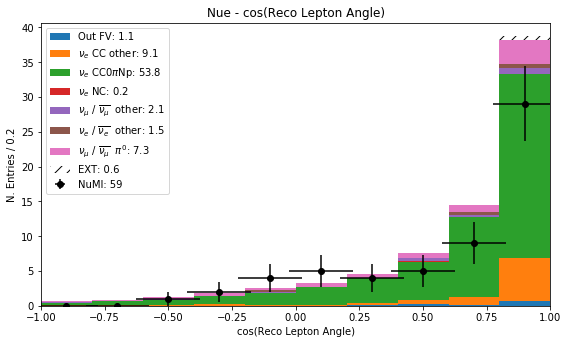

In [9]:
##COMMENT OUT DIRT FOR NUWRO

if isCombined == False:
    category_labels = {
        1 : r'$\nu_e$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_\mu$ CC $\pi^{0}$',
        4 : r'$\nu_\mu$ CC',
        5 : r'$\nu_\mu$ NC $\pi^{0}$',
        6 : r'$\nu_\mu$ NC',
        7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
        8: r'$\nu_e$ NC',
        9: r'$\nu_e$ CC other',
        10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
        0: r'Unknown'
    }


    ########################################
    pup = list(nue_nue_allsel_vars_tot.values())

    i = 0
    for c in nue_nue_allsel_vars_tot.keys():
        nue_nue_allsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_allsel_weights_tot.values())

    i = 0
    for c in nue_nue_allsel_weights_tot.keys():
        nue_nue_allsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 
    pup = list(nue_mc_vars_tot.values())

    i = 0
    for c in nue_mc_vars_tot.keys():
        nue_mc_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_mc_weights_tot.values())

    i = 0
    for c in nue_mc_weights_tot.keys():
        nue_mc_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 
    pup = list(nue_dirt_vars_tot.values())

    i = 0
    for c in nue_dirt_vars_tot.keys():
        nue_dirt_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_dirt_weights_tot.values())

    i = 0
    for c in nue_dirt_weights_tot.keys():
        nue_dirt_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 

    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    varss = [nue_nue_allsel_vars_tot, nue_mc_vars_tot] #, nue_dirt_vars_tot]
    weightss = [nue_nue_allsel_weights_tot, nue_mc_weights_tot]#, nue_dirt_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    nue_allsel_fig = plt.figure(figsize=(8, 7))
    nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
    nue_allsel_ax1.set_xlim([-1, 1])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"

    nue_stacked = nue_allsel_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)



    current_total_hist = (nue_stacked[0][-1])

    n_ext, ext_bins, patches = nue_allsel_ax1.hist(
                nue_ext_vars_tot[str(0)][0],
                weights=nue_ext_weights_tot[str(0)][0],
                bottom=current_total_hist,
                label="EXT: %.1f" % (nue_ext_weights_tot[str(0)][0]) if (nue_ext_weights_tot[str(0)][0]) else "",
                hatch="//",
                color="white",
                bins=BINS,
                range=RANGE)

    nue_allsel_ax1.set_xlim([-1, 1])    #AngleDiff
    current_bincenters =  np.arange(-0.9, 1.1, 0.2)
    current_bin_size = 0.25

    #print(nue_data_vars_tot[str(0)].values())
    #print(type(nue_data_vars_tot[str(0)].values()))


    nue_allsel_ax1.errorbar(
                current_bincenters,
                nue_data_vars_tot[str(0)].values(),
                xerr=current_bin_size/2,
                yerr=nue_data_weights_tot[str(0)].values(),
                fmt='ko',
                label="NuMI: %i" % sum(nue_data_vars_tot[str(0)].values()) if sum(nue_data_vars_tot[str(0)].values()) else "")

    #print(nue_stacked[0][4])
    #print(sum(nue_stacked[0][4]))
    #n_nue_tot = nue_stacked[0][4]

    n_nue_tot = (nue_stacked[0][-1])
    print(n_nue_tot)
    n_nue_tot_allsel = n_nue_tot + n_ext
    #n_nue_tot = (nue_stacked[0])
    print(n_nue_tot_allsel)


    current_total_hist = (nue_stacked[0][-1])
    #current_total_hist = (nue_stacked[0])

    #nue_allsel_ax1.set_yscale('log')
    #nue_allsel_ax1.set_ylim([0, 50])

    plt.title("Nue - cos(Reco Lepton Angle)")
    plt.xlabel("cos(Reco Lepton Angle)")
    plt.ylabel("N. Entries / 0.2")
    plt.legend()
    plt.tight_layout()

In [10]:
#total_nue_selected_noExt = n_nue_tot
#print("total_nue_selected_noExt ", total_nue_selected_noExt)

total_nue_selected_noExt_noDirt = n_nue_tot
print("total_nue_selected_noExt_noDirt ", total_nue_selected_noExt_noDirt)

total_nue_selected_noExt_noDirt  [ 0.73975995  0.78571836  1.23730432  1.83633556  2.49760579  3.23344948
  4.6222202   7.51936418 14.52300678 38.15503539]


In [11]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)

    #print(nue_stacked)

    wanted_key = 2

    nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)


    print('%.50f' % math.fsum(nue_wanted_list))

    #nue_wanted_list = n_nue_tot
    #print(nue_wanted_list)
    print("")
    print(sum(current_total_hist))
    #print(sum(sum(n_nue_tot)))

    print( math.fsum(nue_wanted_list)/math.fsum(current_total_hist))

[1.2244818615522943, 11.371008430928033, 0.0, 0.3559653405903358, 0.47574998287007375, 1.001913047739091]

SUMS
[1.13781846018147, 10.226342398774271, 64.06468442459601, 64.22614342063446, 66.34064246966977, 67.87545765430264, 75.14980001078845]
[9.0885239385928, 53.83834202582174, 0.16145899603844782, 2.1144990490353166, 1.534815184632862, 7.274342356485818]

Wanted List:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08672237551341055, 0.0, 0.07473662052504437]

0.16145899603845492720211041159927845001220703125000

75.14980001078845
0.002148495352153645


[ 0.3265514   0.5690983   0.83544679  1.03131426  1.72210699  2.52235999
  3.65113531  5.47123622 11.37100843 26.33808435]
53.83834202582150396665383595973253250122070312500000



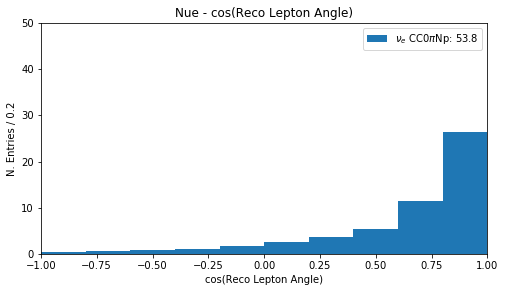

In [12]:
if isCombined == False:
    

    ########################################
    pup = list(nue_nue_sigsel_vars_tot.values())

    i = 0
    for c in nue_nue_sigsel_vars_tot.keys():
        nue_nue_sigsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_sigsel_weights_tot.values())

    i = 0
    for c in nue_nue_sigsel_weights_tot.keys():
        nue_nue_sigsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1

    varss = [nue_nue_sigsel_vars_tot]
    weightss = [nue_nue_sigsel_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    nue_ax1.set_xlim([0, 5])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"

    nue_stacked = nue_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)



    current_total_hist = (nue_stacked[0][-1])

    #nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #current_bincenters =  np.arange(0.25, 5.25, 0.5)
    #current_bincenters =  np.arange(-0.25, 4.75, 0.5)
    #current_bin_size = 0.5
    nue_ax1.set_xlim([-1, 1])    #AngleDiff
    current_bincenters =  np.arange(-0.9, 1.1, 0.2)
    current_bin_size = 0.25

    #print(nue_stacked[0][4])
    #print(sum(nue_stacked[0][4]))
    #n_nue_tot = nue_stacked[0][4]

    n_nue_tot = (nue_stacked[0])
    print(n_nue_tot)
    #n_nue_tot = (nue_stacked[0])
    #print(n_nue_tot)


    #current_total_hist = (nue_stacked[0][-1])
    current_total_hist = (nue_stacked[0])
    print('%.50f' % math.fsum(nue_stacked[0]))
    print()


    nue_ax1.set_ylim([0, 50])

    plt.title("Nue - cos(Reco Lepton Angle)")
    plt.xlabel("cos(Reco Lepton Angle)")
    plt.ylabel("N. Entries / 0.2")
    plt.legend()

    #need to cut data to make it work for shorter plot

In [13]:
if isCombined == False and isRun3 == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')

In [14]:
signal_nue_selected = current_total_hist
print("signal_nue_selected ", signal_nue_selected)

signal_nue_selected  [ 0.3265514   0.5690983   0.83544679  1.03131426  1.72210699  2.52235999
  3.65113531  5.47123622 11.37100843 26.33808435]


In [15]:
cv_nue_bkg_noExt_noDirt = total_nue_selected_noExt_noDirt - signal_nue_selected
print("cv_nue_bkg_noExt_noDirt ", cv_nue_bkg_noExt_noDirt)

print(isRun3)

if isCombined == True:
    np.savetxt("nue_nopions_angleDiff_usingSelection_comb_cv_nue_bkg_noExt_noDirt_"+ending+".csv", 
               cv_nue_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False:
    np.savetxt("nue_nopions_angleDiff_usingSelection_run1_cv_nue_bkg_noExt_noDirt_"+ending+".csv", 
               cv_nue_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_angleDiff_usingSelection_run1_cv_nue_evt_rate_"+ending+".csv", 
               signal_nue_selected,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_angleDiff_usingSelection_run1_cv_nue_full_evt_rate_"+ending+".csv", 
               n_nue_tot_allsel,
               delimiter =", ", 
               fmt ='% s')

cv_nue_bkg_noExt_noDirt  [ 0.41320856  0.21662007  0.40185754  0.80502129  0.77549881  0.71108949
  0.97108489  2.04812796  3.15199835 11.81695104]
False


## Now do Numu

dict_values([24, 16, 11, 38, 32, 44, 57, 99, 115, 228])
<class 'dict_values'>
[ 17.59767353  11.57205672  13.93879259  20.99372923  26.85819608
  31.98953185  50.88605674  76.25980927 131.6326379  270.96410726]


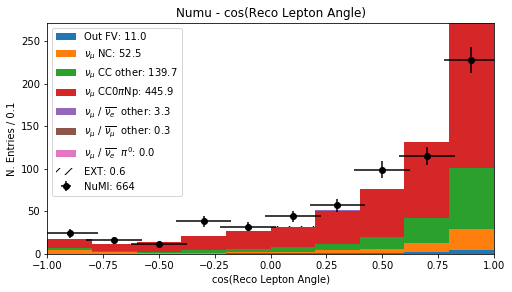

In [16]:
##COMMENT OUT DIRT FOR NUWRO

if isCombined == False:
    category_labels = {
        1 : r'$\nu_\mu$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_e$ CC $\pi^{0}$',
        4 : r'$\nu_e$ CC',
        5 : r'$\nu_e$ NC $\pi^{0}$',
        6 : r'$\nu_e$ NC',
        7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
        8: r'$\nu_\mu$ NC',
        9: r'$\nu_\mu$ CC other',
        10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
        0: r'Unknown'
    }


    ############################################# 
    pup = list(numu_mc_allsel_vars_tot.values())

    i = 0
    for c in numu_mc_allsel_vars_tot.keys():
        numu_mc_allsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_mc_allsel_weights_tot.values())

    i = 0
    for c in numu_mc_allsel_weights_tot.keys():
        numu_mc_allsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
        
    ############################################# 
    pup = list(numu_nue_vars_tot.values())

    i = 0
    for c in numu_nue_vars_tot.keys():
        numu_nue_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_nue_weights_tot.values())

    i = 0
    for c in numu_nue_weights_tot.keys():
        numu_nue_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
        
    ############################################# 
    pup = list(numu_dirt_vars_tot.values())

    i = 0
    for c in numu_dirt_vars_tot.keys():
        numu_dirt_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_dirt_weights_tot.values())

    i = 0
    for c in numu_dirt_weights_tot.keys():
        numu_dirt_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 

    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    varss = [numu_mc_allsel_vars_tot, numu_nue_vars_tot]#, numu_dirt_vars_tot]
    weightss = [numu_mc_allsel_weights_tot, numu_nue_weights_tot]#, numu_dirt_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    numu_allsel_fig = plt.figure(figsize=(8, 7))
    numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
    numu_allsel_ax1.set_xlim([-1, 1])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"

    numu_stacked = numu_allsel_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)



    current_total_hist = (numu_stacked[0][-1])

    n_ext, ext_bins, patches = numu_allsel_ax1.hist(
                numu_ext_vars_tot[str(0)][0],
                weights=numu_ext_weights_tot[str(0)][0],
                bottom=current_total_hist,
                label="EXT: %.1f" % (numu_ext_weights_tot[str(0)][0]) if (numu_ext_weights_tot[str(0)][0]) else "",
                hatch="//",
                color="white",
                bins=BINS,
                range=RANGE)

    #numu_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #current_bincenters =  np.arange(0.25, 5.25, 0.5)
    #current_bin_size = 0.5
    nue_allsel_ax1.set_xlim([-1, 1])    #AngleDiff
    current_bincenters =  np.arange(-0.9, 1.1, 0.2)
    current_bin_size = 0.25

    print(numu_data_vars_tot[str(0)].values())
    print(type(numu_data_vars_tot[str(0)].values()))

    numu_allsel_ax1.errorbar(
                current_bincenters,
                numu_data_vars_tot[str(0)].values(),
                xerr=current_bin_size/2,
                yerr=numu_data_weights_tot[str(0)].values(),
                fmt='ko',
                label="NuMI: %i" % sum(numu_data_vars_tot[str(0)].values()) if sum(numu_data_vars_tot[str(0)].values()) else "")

    #print(nue_stacked[0][4])
    #print(sum(nue_stacked[0][4]))
    #n_nue_tot = nue_stacked[0][4]
    n_numu_tot = (numu_stacked[0][-1])
    print(n_numu_tot)
    n_numu_tot_allsel = n_numu_tot

    #numu_allsel_ax1.set_ylim([0, 1150])

    plt.title("Numu - cos(Reco Lepton Angle)")
    plt.xlabel("cos(Reco Lepton Angle)")
    plt.ylabel("N. Entries / 0.1")
    plt.legend()

In [17]:
#total_numu_selected_noExt = n_numu_tot
#print("total_numu_selected_noExt ", total_numu_selected_noExt)
total_numu_selected_noExt_noDirt = n_numu_tot
print("total_numu_selected_noExt_noDirt ", total_numu_selected_noExt_noDirt)


total_numu_selected_noExt_noDirt  [ 17.59767353  11.57205672  13.93879259  20.99372923  26.85819608
  31.98953185  50.88605674  76.25980927 131.6326379  270.96410726]


In [18]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)


    wanted_key = 3

    numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

    #numu_wanted_list = n_numu_tot

[10.202021777120684, 29.322276162989198, 88.97360635805418, 0.5467993351707321, 0.15981400596325557, 0.007371600269948431]

SUMS
[10.984979309267825, 63.522330003930804, 203.2084677119886, 649.0769731958146, 652.3449851111766, 652.6524888669398, 652.6925911793433]
[52.537350694662976, 139.6861377080578, 445.868505483826, 3.268011915361967, 0.30750375576326405, 0.04010231240340545]

Wanted List:
[0.5408525530280492, 0.03516327009180209, 0.13084945856393126, 0.02301181515207773, 0.15632958127774543, 0.11515842218137351, 0.2081976569714996, 0.18864764646453125, 0.5467993351707321, 1.323002176460193]



[ 10.76224571   8.31618905  11.56670816  17.09151497  21.30187051
  24.42697272  38.79591105  56.15169065  88.97360636 168.48179629]


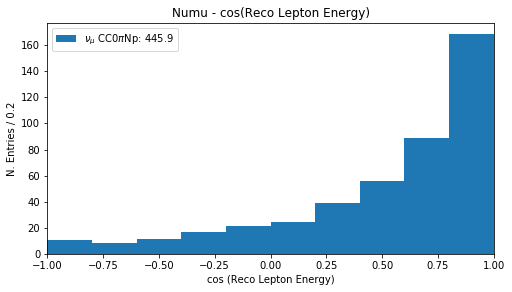

In [19]:
if isCombined == False:
    


    ############################################# 
    pup = list(numu_mc_sigsel_vars_tot.values())

    i = 0
    for c in numu_mc_sigsel_vars_tot.keys():
        numu_mc_sigsel_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_mc_sigsel_weights_tot.values())

    i = 0
    for c in numu_mc_sigsel_weights_tot.keys():
        numu_mc_sigsel_weights_tot[str(c)] = pup2[i][0]
        i = i + 1
    ############################################# 

    varss = [numu_mc_sigsel_vars_tot]
    weightss = [numu_mc_sigsel_weights_tot]
    varss_tot = combine_dicts(varss)
    weightss_tot = combine_dicts(weightss)
    ############################################# 

    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    numu_ax1.set_xlim([-1, 1])
    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
                if sum(weightss_tot[0][str(c)]) else ""
                for c in varss_tot[0].keys()
            ]

    VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"

    numu_stacked = numu_ax1.hist(
                varss_tot[0].values(),
                weights=list(weightss_tot[0].values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)



    current_total_hist = (numu_stacked[0])


    #numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
    #current_bincenters =  np.arange(0.25, 5.25, 0.5)
    #current_bin_size = 0.5
    numu_ax1.set_xlim([-1, 1])    #AngleDiff
    current_bincenters =  np.arange(-0.9, 1.1, 0.2)
    current_bin_size = 0.25


    #print(nue_stacked[0][4])
    #print(sum(nue_stacked[0][4]))
    #n_nue_tot = nue_stacked[0][4]
    n_numu_tot = (numu_stacked[0])
    print(n_numu_tot)

    #numu_ax1.set_ylim([0, 950])

    plt.title("Numu - cos(Reco Lepton Energy)")
    plt.xlabel("cos (Reco Lepton Energy)")
    plt.ylabel("N. Entries / 0.2")
    plt.legend()

In [20]:
if isCombined == False and isRun3 == False:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')

In [21]:
signal_numu_selected = current_total_hist
print("signal_nue_selected ", signal_numu_selected)

signal_nue_selected  [ 10.76224571   8.31618905  11.56670816  17.09151497  21.30187051
  24.42697272  38.79591105  56.15169065  88.97360636 168.48179629]


In [22]:
cv_numu_bkg_noExt_noDirt = total_numu_selected_noExt_noDirt - signal_numu_selected
print("cv_numu_bkg_noExt_noDirt ", cv_numu_bkg_noExt_noDirt)


if isCombined == False and isRun3 == False:
    np.savetxt("numu_nopions_angleDiff_usingSelection_run1_cv_numu_bkg_noExt_noDirt_"+ending+".csv", 
               cv_numu_bkg_noExt_noDirt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_angleDiff_usingSelection_run1_cv_numu_evt_rate_"+ending+".csv", 
               signal_numu_selected,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_angleDiff_usingSelection_run1_cv_numu_full_evt_rate_"+ending+".csv", 
               n_numu_tot_allsel,
               delimiter =", ", 
               fmt ='% s') 

cv_numu_bkg_noExt_noDirt  [  6.83542782   3.25586767   2.37208443   3.90221426   5.55632557
   7.56255913  12.09014569  20.10811862  42.65903154 102.48231097]


## Combined Plots

Nue Combined Plots

[0.5612087579382191, 0.5612087579382191, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624, 0.3089104916683624]
[  1.88692092   3.25535543   2.98208305   6.81901718   8.33561984
   9.82175434  13.15655558  22.62317089  41.98559172 118.01053949]
[  2.19583141   3.25535543   3.90881453   7.99804692   8.95344083
  10.74848581  13.46546607  22.93208138  41.98559172 118.88065874]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


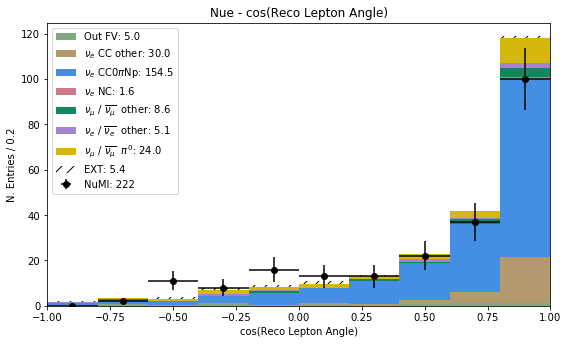

In [9]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}

category_colors = {
    1: "#448ee4",     #dark sky blue
    2: "#82a67d",      #greyishgreen
    3: "#a2cffe",         #baby blue
    4: "#B5385D",       #dark rose
    5: "#9f2305",         #burnt red
    6: "#F46A25",             #orange
    7: "#ff474c",         #lightred
    8: "#cc7a8b",        #dusky pink
    9: "#b2996e",                 #dust
    10: "#A285D1",                 #light purple
    11: "#D5B60A",               #dark yellow
    12: "#11875D",                #dark sea green
    0: "#af884a",          #darktan
}


########################################
pup = list(nue_nue_allsel_vars_tot_run1.values())

i = 0
for c in nue_nue_allsel_vars_tot_run1.keys():
    nue_nue_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run1.values())

i = 0
for c in nue_nue_allsel_weights_tot_run1.keys():
    nue_nue_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run1.values())

i = 0
for c in nue_mc_vars_tot_run1.keys():
    nue_mc_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run1.values())

i = 0
for c in nue_mc_weights_tot_run1.keys():
    nue_mc_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run1.values())

i = 0
for c in nue_dirt_vars_tot_run1.keys():
    nue_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run1.values())

i = 0
for c in nue_dirt_weights_tot_run1.keys():
    nue_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
########################################
pup = list(nue_nue_allsel_vars_tot_run3.values())

i = 0
for c in nue_nue_allsel_vars_tot_run3.keys():
    nue_nue_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run3.values())

i = 0
for c in nue_nue_allsel_weights_tot_run3.keys():
    nue_nue_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run3.values())

i = 0
for c in nue_mc_vars_tot_run3.keys():
    nue_mc_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run3.values())

i = 0
for c in nue_mc_weights_tot_run3.keys():
    nue_mc_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run3.values())

i = 0
for c in nue_dirt_vars_tot_run3.keys():
    nue_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run3.values())

i = 0
for c in nue_dirt_weights_tot_run3.keys():
    nue_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot_run1, nue_mc_vars_tot_run1, nue_dirt_vars_tot_run1, nue_nue_allsel_vars_tot_run3, nue_mc_vars_tot_run3, nue_dirt_vars_tot_run3]
weightss = [nue_nue_allsel_weights_tot_run1, nue_mc_weights_tot_run1, nue_dirt_weights_tot_run1, nue_nue_allsel_weights_tot_run3, nue_mc_weights_tot_run3, nue_dirt_weights_tot_run3]
#varss = [nue_nue_allsel_vars_tot_run3]
#weightss = [nue_nue_allsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
nue_allsel_ax1.set_xlim([-1, 1])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

colors = [
            (category_colors[int(c)]) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"

nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = colors,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

i = 0
nue_ext_var = []
nue_ext_weight = []

for i in range(len(nue_ext_vars_tot_run1[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run1[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(nue_ext_vars_tot_run3[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run3[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run3[str(0)][i])
    i=i+1  

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_var,
            weights=nue_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(nue_ext_weight) if sum(nue_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

print(nue_ext_weight)

nue_allsel_ax1.set_xlim([-1, 1])    #AngleDiff
current_bincenters =  np.arange(-0.9, 1.1, 0.2)
current_bin_size = 0.2


i = 0
nue_data_var = []
nue_data_weight = []

while i < 10: 
    nue_data_var.append(nue_data_vars_tot_run1[str(0)][i] + nue_data_vars_tot_run3[str(0)][i])
    nue_data_weight.append(nue_data_weights_tot_run1[str(0)][i] + nue_data_weights_tot_run3[str(0)][i])
    i=i+1


nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_var,
            xerr=current_bin_size/2,
            yerr=nue_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_var) if (nue_data_var) else "")


n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot + n_ext
#n_nue_tot = (nue_stacked[0])
print(n_nue_tot_allsel)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])

#nue_allsel_ax1.set_yscale('log')
#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - cos(Reco Lepton Angle)")
plt.xlabel("cos(Reco Lepton Angle)")
plt.ylabel("N. Entries / 0.2")
plt.legend()
plt.tight_layout()

In [10]:
nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_angleDiff_comb_"+ending+".svg",bbox_inches='tight' )

In [11]:
total_nue_selected = n_nue_tot_allsel
print("total_nue_selected ", total_nue_selected)

total_nue_selected_noExt = n_nue_tot
print("total_nue_selected_noExt ", total_nue_selected_noExt)

total_nue_selected  [  2.19583141   3.25535543   3.90881453   7.99804692   8.95344083
  10.74848581  13.46546607  22.93208138  41.98559172 118.88065874]
total_nue_selected_noExt  [  1.88692092   3.25535543   2.98208305   6.81901718   8.33561984
   9.82175434  13.15655558  22.62317089  41.98559172 118.01053949]


[ 1.07082741  1.89169263  1.9718418   3.14152079  5.3906471   6.64719756
  9.77986572 16.46475452 30.13778836 78.01650988]
154.51264577866712102149904239922761917114257812500000



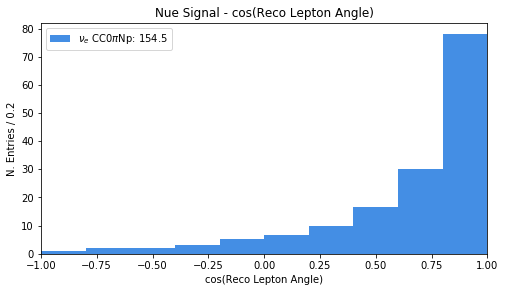

In [12]:



########################################
pup = list(nue_nue_sigsel_vars_tot_run1.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run1.keys():
    nue_nue_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run1.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run1.keys():
    nue_nue_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(nue_nue_sigsel_vars_tot_run3.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run3.keys():
    nue_nue_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run3.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run3.keys():
    nue_nue_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
#print(len(list(nue_nue_sigsel_vars_tot_run1.keys() ))) 

varss = [nue_nue_sigsel_vars_tot_run1, nue_nue_sigsel_vars_tot_run3]
weightss = [nue_nue_sigsel_weights_tot_run1, nue_nue_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([-1, 1])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Elec_asmuon_reco',10,(-1.0, 1.0),"cos(Angle Diff)"


nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])


nue_ax1.set_xlim([-1, 1])    #AngleDiff
current_bincenters =  np.arange(-0.9, 1.1, 0.2)
current_bin_size = 0.2

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)


current_total_hist = (nue_stacked[0])
print('%.50f' % math.fsum(nue_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Nue Signal - cos(Reco Lepton Angle)")
plt.xlabel("cos(Reco Lepton Angle)")
plt.ylabel("N. Entries / 0.2")
plt.legend()

In [13]:
signal_nue_selected = current_total_hist
print("signal_nue_selected ", signal_nue_selected)

signal_nue_selected  [ 1.07082741  1.89169263  1.9718418   3.14152079  5.3906471   6.64719756
  9.77986572 16.46475452 30.13778836 78.01650988]


In [14]:
cv_nue_bkg_noExt = total_nue_selected_noExt - signal_nue_selected
print("cv_nue_bkg_noExt ", cv_nue_bkg_noExt)

cv_nue_bkg_incExt = total_nue_selected - signal_nue_selected
print("cv_nue_bkg_incExt ", cv_nue_bkg_incExt)

if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("nue_nopions_angleDiff_usingSelection_comb_cv_nue_bkg_noExt_"+ending+".csv", 
               cv_nue_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_nopions_angleDiff_usingSelection_comb_cv_nue_bkg_incExt_"+ending+".csv", 
               cv_nue_bkg_incExt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False and noTune == False and MECTune == False:
    np.savetxt("nue_nopions_angleDiff_usingSelection_run1_cv_nue_bkg_noExt_"+ending+".csv", 
               cv_nue_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')

cv_nue_bkg_noExt  [ 0.81609351  1.3636628   1.01024126  3.67749638  2.94497274  3.17455678
  3.37668985  6.15841637 11.84780336 39.99402962]
cv_nue_bkg_incExt  [ 1.125004    1.3636628   1.93697273  4.85652612  3.56279372  4.10128825
  3.68560034  6.46732686 11.84780336 40.86414887]


In [15]:
#Data values
#data_values = list(nue_data_var[str(0)].values())
data_values = np.array(nue_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot_run1[str(0)][0] + nue_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_nue_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg


[  0   2  11   8  16  13  13  22  37 100]
[0.87011925 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
print(n_nue_tot)
print("")
print(n_nue_tot_allsel)

if isCombined == True:
    #np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot_allsel,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')

[ 1.07082741  1.89169263  1.9718418   3.14152079  5.3906471   6.64719756
  9.77986572 16.46475452 30.13778836 78.01650988]

[  2.19583141   3.25535543   3.90881453   7.99804692   8.95344083
  10.74848581  13.46546607  22.93208138  41.98559172 118.88065874]


In [17]:
def plot_signal_and_pur(var1, var2, bins, xaxis, title, savetitle, savetitleplot): 
    
    
    # plot selected signal events 
    fig, ax1 = plt.subplots(figsize=(4, 5))
    
    # compute efficiency
    eff = [ a/b for a, b in zip(var1, var2) ]
    eff_err = []
    for i in range(len(eff)):
        eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/var2[i] ) ) 
        print("In bin", i, ", ", title ," = ", eff[i], " with error = ", eff_err[i])
        
    eff_tot = sum(var1)/sum(var2)
    print("Total ", title)
    print(eff_tot)
        
    # compute bin centers 
    #bc = 0.5*(sel[1][1:]+sel[1][:-1])
    bc =  np.arange(-0.9, 1.1, 0.2)
    x_err = []
    for i in range(len(var1)): 
        x_err.append(0.1)


    # plot efficiency
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 1)

    ax1.set_ylabel(title, fontsize=15)
    ax1.set_title(title)
    ax1.set_xlabel(xaxis)
    
    np.savetxt(savetitle,
           eff,
           delimiter =", ", 
           fmt ='% s')
    
    print("Plot title: ", savetitleplot)
    fig.savefig(savetitleplot,bbox_inches='tight' )

    plt.show()

In bin 0 ,  Purity  =  0.4876637629018675  with error =  0.33731704168426585
In bin 1 ,  Purity  =  0.5811017180082733  with error =  0.27345203707349974
In bin 2 ,  Purity  =  0.5044603123644473  with error =  0.252889147060932
In bin 3 ,  Purity  =  0.3927859921306588  with error =  0.17268591368201636
In bin 4 ,  Purity  =  0.6020754711013998  with error =  0.1635802390890355
In bin 5 ,  Purity  =  0.6184310680753973  with error =  0.1481693954665879
In bin 6 ,  Purity  =  0.7262924041588782  with error =  0.12150341407120135
In bin 7 ,  Purity  =  0.7179790724056695  with error =  0.09396688364981058
In bin 8 ,  Purity  =  0.7178126382168141  with error =  0.06945830656451545
In bin 9 ,  Purity  =  0.6562590643520229  with error =  0.04356098419345829
Total  Purity
0.6593980794367503
Plot title:  batch_pur_nue_fig_full_500_catsel_nopions_angleDiff_matrix_truepur_Jan19.svg


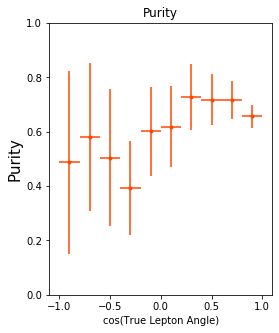

In [18]:
#NEED TOO BE IN TRUTH BINS FOR THIS
#RECO SHOULD JUST GIVE THE NUMBER

variable = 'cosNu_Angle_Numi_Elec_asmuon'  ##Just to note it
xaxis = "cos(True Lepton Angle)"
savetitle = "batch_pur_nue_fig_full_500_catsel_nopions_angleDiff_matrix_truepur_"+ending+".csv"
savetitleplot = "batch_pur_nue_fig_full_500_catsel_nopions_angleDiff_matrix_truepur_"+ending+".svg"

bins = np.arange(-1.0, 1.2, 0.2)

var1 = signal_nue_selected
var2 = total_nue_selected

plot_signal_and_pur(var1, var2, bins, xaxis, "Purity", savetitle, savetitleplot)

Numu Combined Plots

{'0': {0: 24, 1: 16, 2: 11, 3: 38, 4: 32, 5: 44, 6: 57, 7: 99, 8: 115, 9: 228}}
[ 52.1663929   42.86156956  52.53750985  65.56141642  77.27426497
 114.32285137 163.50092852 251.85778062 482.85260713 907.67653934]
[ 54.01985585  43.78830104  55.51339032  67.41487937  80.67228038
 126.11314878 177.76250987 269.03863021 495.68286047 921.99473291]


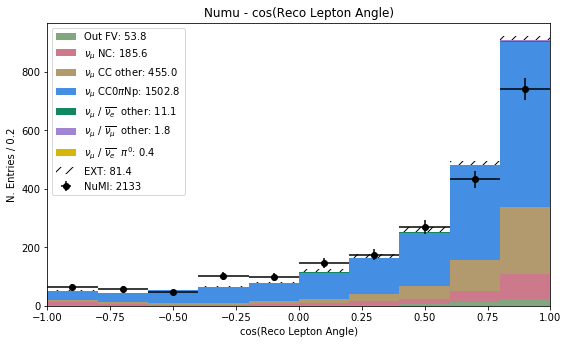

In [19]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}

category_colors = {
    1: "#448ee4",     #dark sky blue
    2: "#82a67d",      #greyishgreen
    3: "#a2cffe",         #baby blue
    4: "#B5385D",       #dark rose
    5: "#9f2305",         #burnt red
    6: "#F46A25",             #orange
    7: "#ff474c",         #lightred
    8: "#cc7a8b",        #dusky pink
    9: "#b2996e",                 #dust
    10: "#A285D1",                 #light purple
    11: "#D5B60A",               #dark yellow
    12: "#11875D",                #dark sea green
    0: "#af884a",          #darktan
}


############################################# 
pup = list(numu_mc_allsel_vars_tot_run1.values())

i = 0
for c in numu_mc_allsel_vars_tot_run1.keys():
    numu_mc_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run1.values())

i = 0
for c in numu_mc_allsel_weights_tot_run1.keys():
    numu_mc_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run1.values())

i = 0
for c in numu_nue_vars_tot_run1.keys():
    numu_nue_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run1.values())

i = 0
for c in numu_nue_weights_tot_run1.keys():
    numu_nue_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run1.values())

i = 0
for c in numu_dirt_vars_tot_run1.keys():
    numu_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_dirt_weights_tot_run1.values())

i = 0
for c in numu_dirt_weights_tot_run1.keys():
    numu_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(numu_mc_allsel_vars_tot_run3.values())

i = 0
for c in numu_mc_allsel_vars_tot_run3.keys():
    numu_mc_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run3.values())

i = 0
for c in numu_mc_allsel_weights_tot_run3.keys():
    numu_mc_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run3.values())

i = 0
for c in numu_nue_vars_tot_run3.keys():
    numu_nue_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run3.values())

i = 0
for c in numu_nue_weights_tot_run3.keys():
    numu_nue_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run3.values())

i = 0
for c in numu_dirt_vars_tot_run3.keys():
    numu_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot_run3.values())

i = 0
for c in numu_dirt_weights_tot_run3.keys():
    numu_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if (key in dict_1) and (key in dict_2):
            dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    

varss = [numu_mc_allsel_vars_tot_run1, numu_nue_vars_tot_run1, numu_dirt_vars_tot_run1, numu_mc_allsel_vars_tot_run3, numu_nue_vars_tot_run3, numu_dirt_vars_tot_run3]
weightss = [numu_mc_allsel_weights_tot_run1, numu_nue_weights_tot_run1, numu_dirt_weights_tot_run1, numu_mc_allsel_weights_tot_run3, numu_nue_weights_tot_run3, numu_dirt_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
numu_allsel_ax1.set_xlim([-1, 1])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

colors = [
            (category_colors[int(c)]) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"

numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = colors,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])
#print(current_total_hist)

i = 0
numu_ext_var = []
numu_ext_weight = []

for i in range(len(numu_ext_vars_tot_run1[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run1[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(numu_ext_vars_tot_run3[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run3[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run3[str(0)][i])
    i=i+1    


n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_var,
            weights=numu_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(numu_ext_weight) if sum(numu_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)



########################
nue_ax1.set_xlim([-1, 1])    #AngleDiff
current_bincenters =  np.arange(-0.9, 1.1, 0.2)
current_bin_size = 0.2

i = 0
numu_data_var = []
numu_data_weight = []

print(numu_data_vars_tot_run1)

while i < 10: #TrueE
    numu_data_var.append(numu_data_vars_tot_run1[str(0)][i] + numu_data_vars_tot_run3[str(0)][i])
    numu_data_weight.append(numu_data_weights_tot_run1[str(0)][i] + numu_data_weights_tot_run3[str(0)][i])
    i=i+1


numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_var,
            xerr=current_bin_size/2,
            yerr=numu_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_var) if sum(numu_data_var) else "")


n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot + n_ext
print(n_numu_tot_allsel)

#numu_allsel_ax1.set_ylim([0, 1150])

plt.title("Numu - cos(Reco Lepton Angle)")
plt.xlabel("cos(Reco Lepton Angle)")
plt.ylabel("N. Entries / 0.2")
plt.legend()
plt.tight_layout()

In [20]:
numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_angleDiff_comb_"+ending+".svg",bbox_inches='tight' )

In [21]:
total_numu_selected = n_numu_tot_allsel
print("total_numu_selected ", total_numu_selected)

total_numu_selected_noExt = n_numu_tot
print("total_numu_selected_noExt ", total_numu_selected_noExt)

total_numu_selected  [ 54.01985585  43.78830104  55.51339032  67.41487937  80.67228038
 126.11314878 177.76250987 269.03863021 495.68286047 921.99473291]
total_numu_selected_noExt  [ 52.1663929   42.86156956  52.53750985  65.56141642  77.27426497
 114.32285137 163.50092852 251.85778062 482.85260713 907.67653934]


[ 32.38818094  30.25190864  42.95236648  54.2849105   61.85434362
  90.07751442 123.28257549 181.26971508 322.10304909 564.30805176]
1502.77261600872316193999722599983215332031250000000000



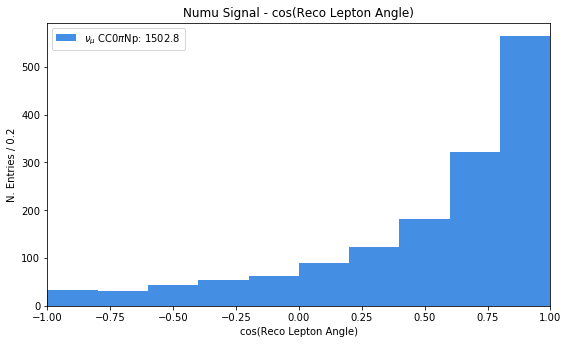

In [22]:



########################################
pup = list(numu_mc_sigsel_vars_tot_run1.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run1.keys():
    numu_mc_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run1.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run1.keys():
    numu_mc_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(numu_mc_sigsel_vars_tot_run3.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run3.keys():
    numu_mc_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run3.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run3.keys():
    numu_mc_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [numu_mc_sigsel_vars_tot_run1, numu_mc_sigsel_vars_tot_run3]
weightss = [numu_mc_sigsel_weights_tot_run1, numu_mc_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([-1, 1])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon_Reco',10,(-1.0, 1.0),"cos(Angle Diff)"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            color = "#448ee4",
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

nue_ax1.set_xlim([-1, 1])    #AngleDiff
current_bincenters =  np.arange(-0.9, 1.1, 0.2)
current_bin_size = 0.2

n_numu_tot = (numu_stacked[0])
print(n_numu_tot)


current_total_hist = (numu_stacked[0])
print('%.50f' % math.fsum(numu_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Numu Signal - cos(Reco Lepton Angle)")
plt.xlabel("cos(Reco Lepton Angle)")
plt.ylabel("N. Entries / 0.2")
plt.legend()
plt.tight_layout()

In [23]:
signal_numu_selected = current_total_hist
print("signal_numu_selected ", signal_numu_selected)

signal_numu_selected  [ 32.38818094  30.25190864  42.95236648  54.2849105   61.85434362
  90.07751442 123.28257549 181.26971508 322.10304909 564.30805176]


In [24]:
cv_numu_bkg_noExt = total_numu_selected_noExt - signal_numu_selected
print("cv_numu_bkg_noExt ", cv_numu_bkg_noExt)

cv_numu_bkg_incExt = total_numu_selected - signal_numu_selected
print("cv_numu_bkg_incExt ", cv_numu_bkg_incExt)

if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("numu_nopions_angleDiff_usingSelection_comb_cv_numu_bkg_noExt_"+ending+".csv", 
               cv_numu_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_nopions_angleDiff_usingSelection_comb_cv_numu_bkg_incExt_"+ending+".csv", 
               cv_numu_bkg_incExt,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == False and isRun3 == False and noTune == False and MECTune == False:
    np.savetxt("numu_nopions_angleDiff_usingSelection_run1_cv_numu_bkg_noExt_"+ending+".csv", 
               cv_numu_bkg_noExt,
               delimiter =", ", 
               fmt ='% s')

cv_numu_bkg_noExt  [ 19.77821196  12.60966093   9.58514337  11.27650592  15.41992135
  24.24533694  40.21835303  70.58806555 160.74955804 343.36848758]
cv_numu_bkg_incExt  [ 21.63167491  13.5363924   12.56102384  13.12996887  18.81793676
  36.03563436  54.47993438  87.76891513 173.57981138 357.68668115]


In [25]:
#Data values
#data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(numu_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot_run1[str(0)][0] + numu_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_numu_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[ 64  57  46 103  97 147 175 270 432 742]
[0.87011925 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
print(n_numu_tot)
print("")
print(n_numu_tot_allsel)

if isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_full_evt_count_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot_allsel,
               delimiter =", ", 
               fmt ='% s')

[ 32.38818094  30.25190864  42.95236648  54.2849105   61.85434362
  90.07751442 123.28257549 181.26971508 322.10304909 564.30805176]

[ 54.01985585  43.78830104  55.51339032  67.41487937  80.67228038
 126.11314878 177.76250987 269.03863021 495.68286047 921.99473291]


In [27]:
def plot_signal_and_pur(var1, var2, bins, xaxis, title, savetitle, savetitleplot): 
    
    
    # plot selected signal events 
    fig, ax1 = plt.subplots(figsize=(4, 5))
    
    # compute efficiency
    eff = [ a/b for a, b in zip(var1, var2) ]
    eff_err = []
    for i in range(len(eff)):
        eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/var2[i] ) ) 
        print("In bin", i, ", ", title ," = ", eff[i], " with error = ", eff_err[i])
        
    eff_tot = sum(var1)/sum(var2)
    print("Total ", title)
    print(eff_tot)
        
    # compute bin centers 
    #bc = 0.5*(sel[1][1:]+sel[1][:-1])
    bc =  np.arange(-0.9, 1.1, 0.2)
    x_err = []
    for i in range(len(var1)): 
        x_err.append(0.1)


    # plot efficiency
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 1)

    ax1.set_ylabel(title, fontsize=15)
    ax1.set_title(title)
    ax1.set_xlabel(xaxis)
    
    np.savetxt(savetitle,
           eff,
           delimiter =", ", 
           fmt ='% s')
    
    print("Plot title: ", savetitleplot)
    fig.savefig(savetitleplot,bbox_inches='tight' )

    plt.show()

[ 32.38818094  30.25190864  42.95236648  54.2849105   61.85434362
  90.07751442 123.28257549 181.26971508 322.10304909 564.30805176]
1502.7726160087232
[ 54.01985585  43.78830104  55.51339032  67.41487937  80.67228038
 126.11314878 177.76250987 269.03863021 495.68286047 921.99473291]
2292.000589182202
In bin 0 ,  Purity  =  0.599560669511707  with error =  0.06666658681850646
In bin 1 ,  Purity  =  0.690867375944743  with error =  0.06983782655688775
In bin 2 ,  Purity  =  0.7737298377046773  with error =  0.05615771662060771
In bin 3 ,  Purity  =  0.8052363367187907  with error =  0.04823227739790296
In bin 4 ,  Purity  =  0.7667360254310034  with error =  0.04708521995838058
In bin 5 ,  Purity  =  0.7142594986668406  with error =  0.040228489767371686
In bin 6 ,  Purity  =  0.6935240483687292  with error =  0.034578717128132236
In bin 7 ,  Purity  =  0.6737683541376682  with error =  0.028583211740120493
In bin 8 ,  Purity  =  0.6498167977445687  with error =  0.02142600345393085
In 

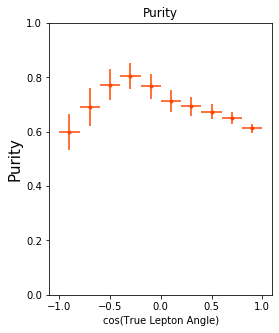

In [28]:
#NEED TO BE IN TRUTH BINS FOR THIS

variable = 'cosNu_Angle_Numi_Muon'  ##Just to note it
xaxis = "cos(True Lepton Angle)"
savetitle = "batch_pur_numu_fig_full_500_catsel_nopions_angleDiff_matrix_truepur_"+ending+".csv"
savetitleplot = "batch_pur_numu_fig_full_500_catsel_nopions_anglediff_matrix_truepur_"+ending+".svg"

bins = np.arange(-1, 1.2, 0.2)

var1 = signal_numu_selected
print(var1)
print(sum(var1))
var2 = total_numu_selected
print(var2)
print(sum(var2))


plot_signal_and_pur(var1, var2, bins, xaxis, "Purity", savetitle, savetitleplot)

## Ratio Plot

Meaningless before unfolding, so don't bother.



## Errors

### Get stat errs

In [29]:
if isCombined == False:
    nue_nue_sigsel_stat_errs = np.array(nue_nue_sigsel_stat_errs)
    nue_nue_notsigsel_stat_errs = np.array(nue_nue_notsigsel_stat_errs)
    nue_mc_stat_errs = np.array(nue_mc_stat_errs)
    nue_dirt_stat_errs = np.array(nue_dirt_stat_errs)
    nue_ext_stat_errs = np.array(nue_ext_stat_errs)

    numu_mc_sigsel_stat_errs = np.array(numu_mc_sigsel_stat_errs)
    numu_mc_notsigsel_stat_errs = np.array(numu_mc_notsigsel_stat_errs)
    numu_nue_stat_errs = np.array(numu_nue_stat_errs)
    numu_dirt_stat_errs = np.array(numu_dirt_stat_errs)
    numu_ext_stat_errs = np.array(numu_ext_stat_errs)


    #numu_detsys_errs = np.array(numu_detsys_errs)
elif isCombined == True:
    nue_nue_sigsel_stat_errs_run1 = np.array(nue_nue_sigsel_stat_errs_run1)
    nue_nue_notsigsel_stat_errs_run1 = np.array(nue_nue_notsigsel_stat_errs_run1)
    nue_mc_stat_errs_run1 = np.array(nue_mc_stat_errs_run1)
    nue_dirt_stat_errs_run1= np.array(nue_dirt_stat_errs_run1)
    nue_ext_stat_errs_run1 = np.array(nue_ext_stat_errs_run1)

    numu_mc_sigsel_stat_errs_run1 = np.array(numu_mc_sigsel_stat_errs_run1)
    numu_mc_notsigsel_stat_errs_run1 = np.array(numu_mc_notsigsel_stat_errs_run1)
    numu_nue_stat_errs_run1 = np.array(numu_nue_stat_errs_run1)
    numu_dirt_stat_errs_run1 = np.array(numu_dirt_stat_errs_run1)
    numu_ext_stat_errs_run1 = np.array(numu_ext_stat_errs_run1)


    #numu_detsys_errs = np.array(numu_detsys_errs)
    ###########################################
    nue_nue_sigsel_stat_errs_run3 = np.array(nue_nue_sigsel_stat_errs_run3)
    nue_nue_notsigsel_stat_errs_run3 = np.array(nue_nue_notsigsel_stat_errs_run3)
    nue_mc_stat_errs_run3 = np.array(nue_mc_stat_errs_run3)
    nue_dirt_stat_errs_run3 = np.array(nue_dirt_stat_errs_run3)
    nue_ext_stat_errs_run3 = np.array(nue_ext_stat_errs_run3)

    numu_mc_sigsel_stat_errs_run3 = np.array(numu_mc_sigsel_stat_errs_run3)
    numu_mc_notsigsel_stat_errs_run3 = np.array(numu_mc_notsigsel_stat_errs_run3)
    numu_nue_stat_errs_run3 = np.array(numu_nue_stat_errs_run3)
    numu_dirt_stat_errs_run3 = np.array(numu_dirt_stat_errs_run3)
    numu_ext_stat_errs_run3 = np.array(numu_ext_stat_errs_run3)


    #numu_detsys_errs = np.array(numu_detsys_errs)

### Expected Error Calculations

In [30]:
# Merge the backgrounds from nue and mc stat errors
if isCombined == False:
    errs = [nue_nue_notsigsel_stat_errs, nue_mc_stat_errs]
elif isCombined == True:
    errs = [nue_nue_notsigsel_stat_errs_run1, nue_mc_stat_errs_run1, nue_nue_notsigsel_stat_errs_run3, nue_mc_stat_errs_run3]    

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs nue = ", total_errs)
print("")

nue_nue_mc_bkg_stat_errs = total_errs

#####################################################
if isCombined == False:
    errs = [numu_mc_notsigsel_stat_errs, numu_nue_stat_errs]
elif isCombined == True:
    errs = [numu_mc_notsigsel_stat_errs_run1, numu_nue_stat_errs_run1, numu_mc_notsigsel_stat_errs_run3, numu_nue_stat_errs_run3]    


#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)

masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
numu_nue_mc_bkg_stat_errs = total_errs


print("total errs numu = ", numu_nue_mc_bkg_stat_errs)

total errs nue =  [0.09470887717853975, 0.378697951951556, 0.1657512330880186, 0.6988262703710311, 0.4947672735900913, 0.5979667008849271, 0.5638633171486169, 0.8578328307831371, 1.4004202655548383, 4.608263436590336]

total errs numu =  [3.550565695298906, 2.3416903445986663, 1.951491540991665, 1.8908256249871498, 2.940414411879323, 4.41800073158825, 8.723921320230966, 15.088102879361427, 42.065522293922605, 80.49323326025944]


In [31]:
#Don't the ext values were rooted before, square them to combine!

if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs))
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs)
    #totalstat_nue = totalstat_nue
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    
    nue_bkg_exp_err_squared = nue_nue_mc_bkg_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs)
    print("nue_bkg_exp_err ", nue_bkg_exp_err_squared)
    print("")
    
    if isRun3 == False and noTune == False and isCombined == False and MECTune == False:
        np.savetxt("nue_bkg_exp_err_squared_angle_"+ending+".csv", 
                   nue_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs))
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs)
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")
    
    numu_bkg_exp_err_squared = numu_nue_mc_bkg_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs)
    print("numu_bkg_exp_err ", numu_bkg_exp_err_squared)
    
    if isRun3 == False and noTune == False and isCombined == False and MECTune == False:
        np.savetxt("numu_bkg_exp_err_squared_angle_"+ending+".csv", 
                   numu_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3))
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3)
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    
    nue_bkg_exp_err_squared = nue_nue_mc_bkg_stat_errs + nue_dirt_stat_errs_run1 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3)
    print("nue_bkg_exp_err ", nue_bkg_exp_err_squared)
    print("")
    
    nue_sig_only_err = nue_nue_sigsel_stat_errs_run1 + nue_nue_sigsel_stat_errs_run3
    
    if noTune == False and MECTune == False and isCombined == True:
        np.savetxt("nue_bkg_exp_err_squared_angle_comb_"+ending+".csv", 
                   nue_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    elif (noTune == True or MECTune == True) and isCombined == True:
        np.savetxt("nue_sig_only_err_squared_angle_comb_"+ending+".csv", 
                   nue_sig_only_err,
                   delimiter =", ", 
                   fmt ='% s')
        np.savetxt("nue_total_noTune_err_squared_angle_comb_"+ending+".csv", 
                   totalstat_nue,
                   delimiter =", ", 
                   fmt ='% s')   

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3))
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3)
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")

    numu_bkg_exp_err_squared = numu_nue_mc_bkg_stat_errs + numu_dirt_stat_errs_run1 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3)
    print("numu_bkg_exp_err ", numu_bkg_exp_err_squared)
    
    numu_sig_only_err = numu_mc_sigsel_stat_errs_run1 + numu_mc_sigsel_stat_errs_run3
    
    if noTune == False and MECTune == False and isCombined == True:
        np.savetxt("numu_bkg_exp_err_squared_angle_comb_"+ending+".csv", 
                   numu_bkg_exp_err_squared,
                   delimiter =", ", 
                   fmt ='% s')
    elif (noTune == True or MECTune == True) and isCombined == True:
        np.savetxt("numu_sig_only_err_squared_angle_comb_"+ending+".csv", 
                   numu_sig_only_err,
                   delimiter =", ", 
                   fmt ='% s')
        np.savetxt("numu_total_noTune_err_squared_angle_comb_"+ending+".csv", 
                   totalstat_numu,
                   delimiter =", ", 
                   fmt ='% s')   
   

totalstat_nue  [0.4374552  0.41560363 1.13195427 1.94342386 1.23750003 1.64368571
 1.10820047 1.59530192 2.33987631 8.57252365]
nue_exp_err  [0.66140396 0.64467327 1.0639334  1.39406738 1.11242979 1.28206307
 1.05271101 1.26305262 1.52966542 2.92788723]

nue_bkg_exp_err  [0.40361937 0.37869795 1.09248271 1.87785601 1.11476086 1.52469818
 0.87277381 1.16674332 1.48117631 5.47838269]

totalstat_numu  [ 13.21644865  10.43130176  16.19081495  19.20145408  20.77274383
  51.88437655  64.40652557  97.91764409 197.84588446 471.71644472]
numu_exp_err  [ 3.63544339  3.22975259  4.02378118  4.38194638  4.55771257  7.20308105
  8.02536763  9.89533446 14.06576996 21.71903416]

numu_bkg_exp_err  [ 5.56527103  3.31864546  4.92737201  3.85884493  6.41568387 16.33395278
 23.07504552 32.3956967  55.28743915 96.00956256]


In [32]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])


print(nue_cov)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [33]:
if isCombined == False:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + (nue_ext_stat_errs*nue_ext_stat_errs))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + (numu_ext_stat_errs*numu_ext_stat_errs))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))
elif isCombined == True:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + (nue_ext_stat_errs_run1*nue_ext_stat_errs_run1) + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + (nue_ext_stat_errs_run3*nue_ext_stat_errs_run3))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + (numu_ext_stat_errs_run1*numu_ext_stat_errs_run1) + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + (numu_ext_stat_errs_run3*numu_ext_stat_errs_run3))
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


nue_cov_mc_stat =  [0.4374552  0.41560363 1.13195427 1.94342386 1.23750003 1.64368571
 1.10820047 1.59530192 2.33987631 8.57252365]
numu_cov_mc_stat =  [ 13.21644865  10.43130176  16.19081495  19.20145408  20.77274383
  51.88437655  64.40652557  97.91764409 197.84588446 471.71644472]


In [34]:
#9.9% uncertainty added for nue
#23.8% uncertainty added for numu

#################################

#12.2% fractional value being added
#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

###################################

nue_detsys_errs = (0.099*0.099)*(n_nue_tot_allsel*n_nue_tot_allsel)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot_allsel)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = (0.238*0.238)*(n_numu_tot_allsel*n_numu_tot_allsel)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot_allsel
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################


nue_cov_mc_detsys =  [4.72572426e-02 1.03864519e-01 1.49747823e-01 6.26957763e-01
 7.85688370e-01 1.13230901e+00 1.77710533e+00 5.15415337e+00
 1.72771039e+01 1.38513721e+02]
totalstat_nue_detsys  [4.72572426e-02 1.03864519e-01 1.49747823e-01 6.26957763e-01
 7.85688370e-01 1.13230901e+00 1.77710533e+00 5.15415337e+00
 1.72771039e+01 1.38513721e+02]
nue_detsys_exp_err  [ 0.21738731  0.32228019  0.38697264  0.79180664  0.88639064  1.0641001
  1.33308114  2.27027606  4.15657358 11.76918522]
nue_detsys_frac_err  [0.099 0.099 0.099 0.099 0.099 0.099 0.099 0.099 0.099 0.099]

numu_cov_mc_detsys =  [  165.2953955    108.6100727    174.56188257   257.43372304
   368.64010482   900.89598746  1789.92263965  4099.99380377
 13917.51566187 48151.6079417 ]
totalstat_numu_detsys  [  165.2953955    108.6100727    174.56188257   257.43372304
   368.64010482   900.89598746  1789.92263965  4099.99380377
 13917.51566187 48151.6079417 ]
numu_detsys_exp_err  [ 12.85672569  10.42161565  13.2121869   16.04474

### Now need the systematic errors

In [35]:
if isCombined == False:
    nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
    nue_cov += (cov_nue_nue_geo)
    nue_cov += (cov_nue_mc_ppfx + cov_nue_mc_genie + cov_nue_mc_reint)
    nue_cov += (cov_nue_mc_geo)
    nue_cov += (cov_nue_dirt_ppfx + cov_nue_dirt_genie + cov_nue_dirt_reint)
    nue_cov += (cov_nue_dirt_geo)

    numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
    numu_cov += (cov_numu_mc_geo)
    numu_cov += (cov_numu_nue_ppfx + cov_numu_nue_genie + cov_numu_nue_reint)
    numu_cov += (cov_numu_nue_geo)
    numu_cov += (cov_numu_dirt_ppfx + cov_numu_dirt_genie + cov_numu_dirt_reint)
    numu_cov += (cov_numu_dirt_geo)
elif isCombined == True:
    nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
    nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3 )
    nue_cov += (cov_nue_mc_ppfx_run1 + cov_nue_mc_genie_run1 + cov_nue_mc_reint_run1 + cov_nue_mc_ppfx_run3 + cov_nue_mc_genie_run3 + cov_nue_mc_reint_run3)
    nue_cov += (cov_nue_mc_geo_run1 + cov_nue_mc_geo_run3)
    nue_cov += (cov_nue_dirt_ppfx_run1 + cov_nue_dirt_genie_run1 + cov_nue_dirt_reint_run1 + cov_nue_dirt_ppfx_run3 + cov_nue_dirt_genie_run3 + cov_nue_dirt_reint_run3)
    nue_cov += (cov_nue_dirt_geo_run1 + cov_nue_dirt_geo_run3)

    numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1 + cov_numu_mc_ppfx_run3 + cov_numu_mc_genie_run3 + cov_numu_mc_reint_run3)
    numu_cov += (cov_numu_mc_geo_run1 +cov_numu_mc_geo_run3)
    numu_cov += (cov_numu_nue_ppfx_run1 + cov_nue_dirt_genie_run1 + cov_nue_dirt_reint_run1 + cov_nue_nue_ppfx_run3 + cov_numu_nue_genie_run3 + cov_numu_nue_reint_run3)
    numu_cov += (cov_numu_nue_geo_run1 + cov_nue_dirt_geo_run3)
    numu_cov += (cov_numu_dirt_ppfx_run1 + cov_numu_dirt_genie_run1 + cov_numu_dirt_reint_run1 + cov_numu_dirt_ppfx_run3 + cov_numu_dirt_genie_run3 + cov_numu_dirt_reint_run3)
    numu_cov += (cov_numu_dirt_geo_run1 + cov_numu_dirt_geo_run3)

In [36]:
if isCombined == False and isRun3 == False:
    nue_cov_genie_only = cov_nue_nue_genie + cov_nue_mc_genie + cov_nue_dirt_genie
    
    np.savetxt("nue_cov_genie_only_angle_"+ending+".csv", 
           nue_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  

    numu_cov_genie_only = cov_numu_mc_genie + cov_numu_nue_genie + cov_numu_dirt_genie
    
    np.savetxt("numu_cov_genie_only_angle_"+ending+".csv", 
           numu_cov_genie_only,
           delimiter =", ", 
           fmt ='% s') 

In [38]:
#only for combined
addNuWro = True

if (addNuWro == True):
    ending = "Jan19"
    
    nue_cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_angle_nueonly_"+ending+".csv", header=None)
    nue_cov_nuwro = nue_cov_nuwro.values
    
    numu_cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_angle_numuonly_"+ending+".csv", header=None)
    numu_cov_nuwro = numu_cov_nuwro.values
    
    ending = "Jan19_AddnuWro"

Sidenote for Unfolding

In [39]:
if (addNuWro == False):
    total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
elif (addNuWro == True):
    total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys +  nue_cov_nuwro

#total_nue_cov_frac = np.nan_to_num(total_nue_cov / (n_nue_tot_allsel**2))
####################################
bins = np.arange(-1, 1.2, 0.2)
print(bins)

total_nue_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_nue_cov[i][j]
        
        if n_nue_tot_allsel[i]*n_nue_tot_allsel[j] != 0:
            total_nue_frac_cov[i][j] = c/(n_nue_tot_allsel[i]*n_nue_tot_allsel[j])
            
print(total_nue_frac_cov)
print(len(total_nue_frac_cov))

#print(total_nue_cov)
print(np.diag(total_nue_cov))
print("")
#print(total_nue_cov_frac)
print(np.diag(total_nue_frac_cov))

##########################################
#print(bins)
total_nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_nue_cov)): 
        for j in range(len(total_nue_cov[i])): 

            if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
                total_nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
                
print("")
print(total_nue_cor)

[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]
[[0.644933578240287, -0.24511605014974905, -0.044333320831138515, 0.08411669804603752, -0.10990447964952257, -0.16687003390967933, 0.08122679542452188, -0.0974693262252473, 0.009742532755060282, 0.10834588423036612], [-0.24511605014974905, 0.22729934774138863, 0.03494001522765646, -0.028755802474353193, 0.07590584448329254, 0.10137192292716708, -0.02208449002036543, 0.06590691148017354, 0.010562465817119554, -0.042575661310673314], [-0.044333320831138515, 0.03494001522765646, 0.10127286450647638, -0.0008937785987496529, 0.021766668175709342, 0.027558317327347575, 0.00238487017462876, 0.020983839961097633, 0.008495291340831091, -0.0031657583058147805], [0.08411669804603752, -0.028755802474353193, -0.0008937785987496529, 0.06960648688949882, -0.004890729037984851, -0.016254510455469967, 0.019796031814275524, -0

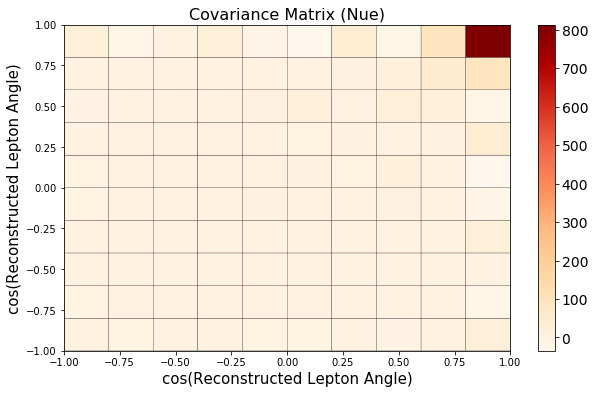

In [40]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)

plt.title('Covariance Matrix (Nue)', fontsize=16)


plt.savefig("Nue_Full_Reco_Cov_AngleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

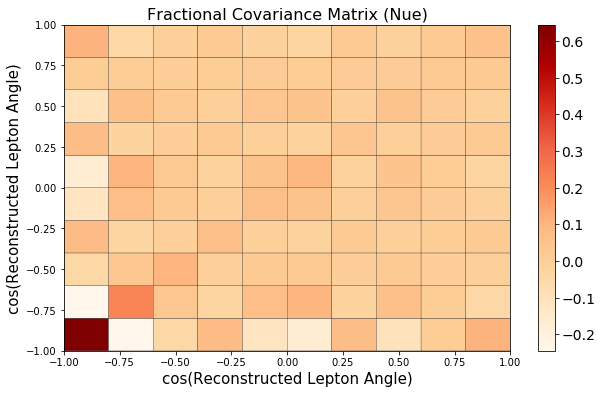

In [41]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_frac_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)

plt.title('Fractional Covariance Matrix (Nue)', fontsize=16)

plt.savefig("Nue_Full_Reco_FracCov_AngleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

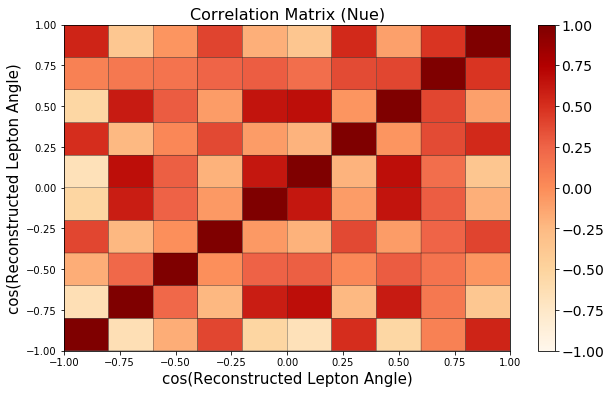

In [42]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)

plt.title('Correlation Matrix (Nue)', fontsize=16)

plt.savefig("Nue_Full_Reco_Cor_AngleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

In [43]:
#print(total_nue_cov)
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_recoCut_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_recoCut_run3_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_recoCut_comb_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s')     

#---------------------------------------------------------

In [44]:
if (addNuWro == False):
    total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys
elif (addNuWro == True):
    total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys + numu_cov_nuwro

#total_numu_cov_frac = total_numu_cov / (n_numu_tot_allsel**2)
#################################

total_numu_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_numu_cov[i][j]
        
        if n_numu_tot_allsel[i]*n_numu_tot_allsel[j] != 0:
            total_numu_frac_cov[i][j] = c/(n_numu_tot_allsel[i]*n_numu_tot_allsel[j])
            
print(total_numu_frac_cov)


print(n_numu_tot_allsel**2)
print("")
print(np.diag(numu_cov))
print("")
print(np.diag(total_numu_cov))
print("")
print(np.diag(total_numu_frac_cov))

##########################################

total_numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_numu_cov)): 
        for j in range(len(total_numu_cov[i])): 
            
            if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
                total_numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))
                
print("")
print(total_numu_cor)

[[0.08590847162365206, 0.0010455620167576208, -0.00304884563328764, 0.017500999058018364, 0.015429407929885347, 0.0019830714340265346, 0.014135581640246555, 0.006277854486428662, 0.011430136756683801, 0.009469351368395175], [0.0010455620167576208, 0.2903287746926099, 0.22381036977012822, 0.023370650858260678, 0.04145016536330486, 0.12369935673431351, 0.021735981267321996, 0.07400359940271613, 0.005826302461489089, -0.017890905697489405], [-0.00304884563328764, 0.22381036977012822, 0.2869347803323031, 0.023350873611516342, 0.04070386718506568, 0.12745078750889655, 0.023599815960639155, 0.07709606091996296, 0.010705764622976547, -0.00982242852364403], [0.017500999058018364, 0.023370650858260678, 0.023350873611516342, 0.08113644106717213, 0.018151379723419642, 0.020209335652337224, 0.017870200250700206, 0.01787299735534291, 0.016783349353813124, 0.015727009462545963], [0.015429407929885347, 0.04145016536330486, 0.04070386718506568, 0.018151379723419642, 0.08128305119165434, 0.027241946673

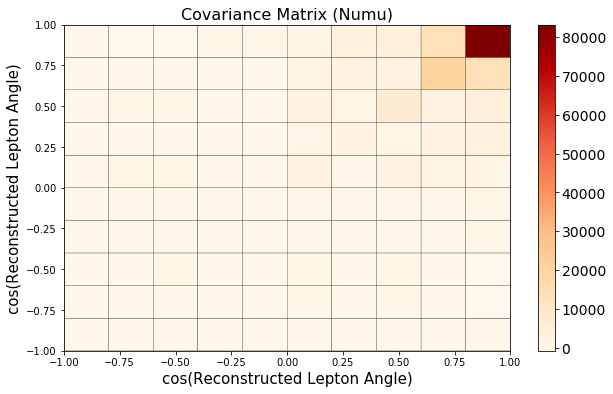

In [45]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)


plt.title('Covariance Matrix (Numu)', fontsize=16)

if isCombined == True:
    plt.savefig("Numu_Full_Reco_Cov_AngleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

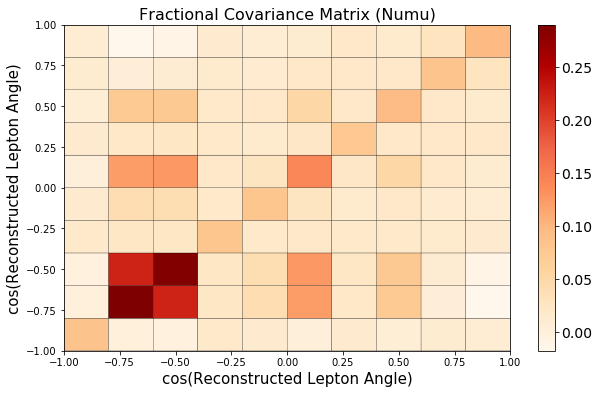

In [46]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_frac_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)

plt.title('Fractional Covariance Matrix (Numu)', fontsize=16)

if isCombined == True:
    plt.savefig("Numu_Full_Reco_FracCov_AngleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

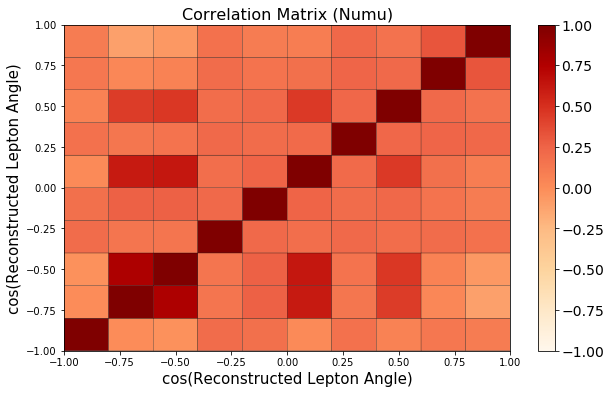

In [47]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])

plt.xlabel("cos(Reconstructed Lepton Angle)", fontsize=15)
plt.ylabel("cos(Reconstructed Lepton Angle)", fontsize=15)

plt.title('Correlation Matrix (Numu)', fontsize=16)

if isCombined == True:
    plt.savefig("Numu_Full_Reco_Cor_AngleDiff_"+ending+".svg", bbox_inches='tight')

plt.show()

In [48]:
#print(type(total_numu_cov))
if isRun3 == False and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_recoCut_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_recoCut_run3_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_recoCut_comb_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s')     


In [49]:
print(n_nue_tot)

[ 1.07082741  1.89169263  1.9718418   3.14152079  5.3906471   6.64719756
  9.77986572 16.46475452 30.13778836 78.01650988]


In [50]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))
nue_exp_err_frac_sys = np.sqrt( np.diag((nue_cov)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_sys ", nue_exp_err_frac_sys)
nue_exp_err_frac_stat = np.sqrt( np.diag((nue_cov_mc_stat)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_stat ", nue_exp_err_frac_stat)
nue_exp_err_frac_detsys = np.sqrt( np.diag((nue_cov_mc_detsys)))/ n_nue_tot_allsel
#print("nue_exp_err_frac_detsys ", nue_exp_err_frac_detsys)

#print("")
#print("")

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))
numu_exp_err_frac_sys = np.sqrt( np.diag((numu_cov)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_sys ", numu_exp_err_frac_sys)
numu_exp_err_frac_stat = np.sqrt( np.diag((numu_cov_mc_stat)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_stat ", numu_exp_err_frac_stat)
numu_exp_err_frac_detsys = np.sqrt( np.diag((numu_cov_mc_detsys)))/ n_numu_tot_allsel
#print("numu_exp_err_frac_detsys ", numu_exp_err_frac_detsys)

print("")
print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)                   #includes all errors
print("nue_frac_err ",nue_frac_err)
print("#########################################################")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = numu_exp_err / n_numu_tot_allsel
print("")
print("numu_frac_err ", numu_frac_err)



nue_exp_err  [ 0.76583845  1.02861574  1.2110228   1.93973806  1.84584853  2.12634261
  2.29758277  3.88139169  7.05774509 23.64812344]

nue_frac_err  [0.34876924 0.31597648 0.30981843 0.24252647 0.2061608  0.19782718
 0.17062779 0.16925597 0.16809922 0.19892322]
#########################################################
numu_exp_err  [ 15.65502715  12.90020048  15.92040622  19.18777371  22.64322564
  36.21001629  49.55318664  74.77667254 142.93433333 283.98104713]

numu_frac_err  [0.28980135 0.29460381 0.28678497 0.28462224 0.28068161 0.28712324
 0.27876062 0.27794028 0.28835843 0.30800723]


# Plots

In [51]:
nue_bin_edges = np.arange(-1, 1.2, 0.2)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)
print(nue_frac_err)

nue_allsel_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot_allsel-nue_exp_err))


[0.34876924 0.31597648 0.30981843 0.24252647 0.2061608  0.19782718
 0.17062779 0.16925597 0.16809922 0.19892322]


<BarContainer object of 10 artists>

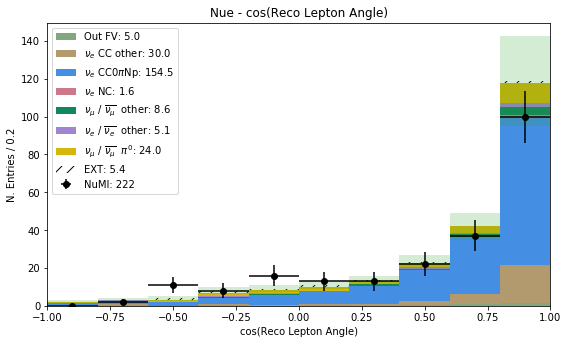

In [52]:
nue_allsel_fig

In [53]:
if isRun3 == False and isCombined == False:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_angleDiff_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_angleDiff_run3_"+ending+".pdf")  
elif isCombined == True:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_angleDiff_comb_complete_"+ending+".svg", bbox_inches='tight') 

In [54]:
numu_bin_edges = np.arange(-1, 1.2, 0.2)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = numu_exp_err / n_numu_tot_allsel
print(numu_frac_err)

numu_allsel_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_numu_tot_allsel-numu_exp_err))

[0.28980135 0.29460381 0.28678497 0.28462224 0.28068161 0.28712324
 0.27876062 0.27794028 0.28835843 0.30800723]


<BarContainer object of 10 artists>

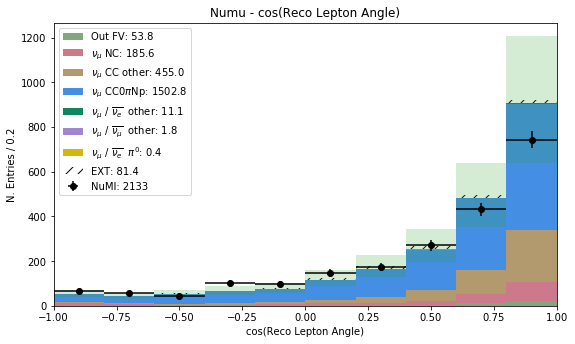

In [55]:
numu_allsel_fig

In [56]:
if isRun3 == False and isCombined == False:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_angleDiff_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_angleDiff_run3_"+ending+".pdf")  
elif isCombined == True:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_angleDiff_comb_complete_"+ending+".svg", bbox_inches='tight')

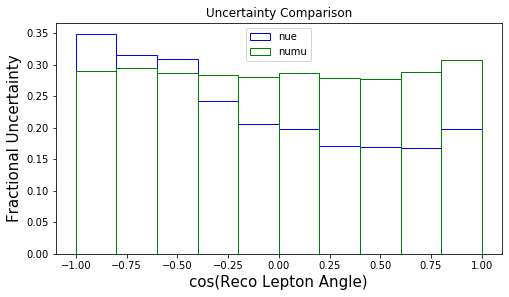

In [57]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(nue_gs[0])


bins = np.arange(-1, 1.2, 0.2)
count = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]


sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
#sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('cos(Reco Lepton Angle)', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
#errors_ax1.set_ylim([0, 1.5])


## For Blockwise Unfolding

Data (MC) Values

In [58]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [ 1.07082741  1.89169263  1.9718418   3.14152079  5.3906471   6.64719756
  9.77986572 16.46475452 30.13778836 78.01650988]


In [59]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [ 32.38818094  30.25190864  42.95236648  54.2849105   61.85434362
  90.07751442 123.28257549 181.26971508 322.10304909 564.30805176]


In [60]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))


[  1.07082741   1.89169263   1.9718418    3.14152079   5.3906471
   6.64719756   9.77986572  16.46475452  30.13778836  78.01650988
  32.38818094  30.25190864  42.95236648  54.2849105   61.85434362
  90.07751442 123.28257549 181.26971508 322.10304909 564.30805176]
20


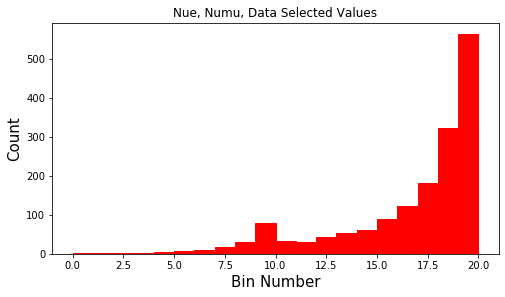

In [61]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

In [62]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')  

Systematics

In [63]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

ending = "Jan19"

In [64]:
if isCombined == False and isRun3 == False:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict = nue_dirt_geo_detvar_dict.to_dict('series')

if isCombined == True:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict_run1 = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run1 = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict_run1 = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict_run1 = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict_run1 = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run1 = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict_run1 = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict_run1 = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict_run1 = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict_run1 = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict_run1 = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict_run1 = nue_dirt_geo_detvar_dict.to_dict('series')
    
#############################################################################################################
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict_run3 = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run3 = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict_run3 = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict_run3 = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict_run3 = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run3 = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict_run3 = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict_run3 = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict_run3 = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict_run3 = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict_run3 = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict_run3 = nue_dirt_geo_detvar_dict.to_dict('series')

In [65]:
if isCombined == False and isRun3 == False:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict = numu_dirt_geo_detvar_dict.to_dict('series')
    
    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict = numu_nue_geo_detvar_dict.to_dict('series')
    
if isCombined == True:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict_run1 = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run1 = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict_run1 = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict_run1 = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict_run1 = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict_run1 = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict_run1 = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict_run1 = numu_dirt_geo_detvar_dict.to_dict('series')
    
    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict_run1 = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict_run1 = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict_run1 = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict_run1 = numu_nue_geo_detvar_dict.to_dict('series')
    
#################################################################################################################
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict_run3 = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run3 = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict_run3 = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict_run3 = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict_run3 = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict_run3 = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict_run3 = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict_run3 = numu_dirt_geo_detvar_dict.to_dict('series')
    
    #####################################################################################

    numu_nue_ppfx_detvar_dict = pd.read_csv("numu_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_nue_ppfx_detvar_dict_run3 = numu_nue_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_genie_detvar_dict = pd.read_csv("numu_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_genie_detvar_dict.pop("Unnamed: 0")

    numu_nue_genie_detvar_dict_run3 = numu_nue_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_reint_detvar_dict = pd.read_csv("numu_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_reint_detvar_dict.pop("Unnamed: 0")

    numu_nue_reint_detvar_dict_run3 = numu_nue_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_nue_geo_detvar_dict = pd.read_csv("numu_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_angleDiff_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_geo_detvar_dict.pop("Unnamed: 0")

    numu_nue_geo_detvar_dict_run3 = numu_nue_geo_detvar_dict.to_dict('series')

In [66]:
if isCombined == False:
    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    pup = [nue_nue_genie_detvar_dict, \
          nue_mc_genie_detvar_dict,\
          nue_dirt_genie_detvar_dict, ]
    nue_genie_detvar_dict = combine_dicts(pup)[0]
    
    ###########
    #############


    pup = [numu_mc_genie_detvar_dict, \
          numu_dirt_genie_detvar_dict,  \
          numu_nue_genie_detvar_dict,]
    numu_genie_detvar_dict = combine_dicts(pup)[0]
    

In [67]:
if isCombined == True:
    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    pup = [nue_nue_ppfx_detvar_dict_run1, nue_nue_ppfx_detvar_dict_run3, \
          nue_mc_ppfx_detvar_dict_run1, nue_mc_ppfx_detvar_dict_run3, \
          nue_dirt_ppfx_detvar_dict_run1, nue_dirt_ppfx_detvar_dict_run3 ]
    nue_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [nue_nue_genie_detvar_dict_run1, nue_nue_genie_detvar_dict_run3 , \
          nue_mc_genie_detvar_dict_run1, nue_mc_genie_detvar_dict_run3, \
          nue_dirt_genie_detvar_dict_run1, nue_dirt_genie_detvar_dict_run3 ]
    nue_genie_detvar_dict = combine_dicts(pup)[0]
    #print(nue_nue_genie_detvar_dict_run3)
    
    pup = [nue_nue_reint_detvar_dict_run1, nue_nue_reint_detvar_dict_run3, \
          nue_mc_reint_detvar_dict_run1, nue_mc_reint_detvar_dict_run3, \
          nue_dirt_reint_detvar_dict_run1, nue_dirt_reint_detvar_dict_run3]
    nue_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_nue_geo_detvar_dict_run1, nue_nue_geo_detvar_dict_run3, \
          nue_mc_geo_detvar_dict_run1, nue_mc_geo_detvar_dict_run3, \
          nue_dirt_geo_detvar_dict_run1, nue_dirt_geo_detvar_dict_run3]
    nue_geo_detvar_dict = combine_dicts(pup)[0]
    
    ###########
    #############
    
    pup = [numu_mc_ppfx_detvar_dict_run1, numu_mc_ppfx_detvar_dict_run3, \
          numu_dirt_ppfx_detvar_dict_run1, numu_dirt_ppfx_detvar_dict_run3 , \
          numu_nue_ppfx_detvar_dict_run1, numu_nue_ppfx_detvar_dict_run3]
    numu_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [numu_mc_genie_detvar_dict_run1, numu_mc_genie_detvar_dict_run3, \
          numu_dirt_genie_detvar_dict_run1, numu_dirt_genie_detvar_dict_run3, \
          numu_nue_genie_detvar_dict_run1, numu_nue_genie_detvar_dict_run3]
    numu_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_mc_reint_detvar_dict_run1, numu_mc_reint_detvar_dict_run3, \
          numu_dirt_reint_detvar_dict_run1, numu_dirt_reint_detvar_dict_run3 , \
          numu_nue_reint_detvar_dict_run1, numu_nue_reint_detvar_dict_run3]
    numu_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_mc_geo_detvar_dict_run1, numu_mc_geo_detvar_dict_run3, \
          numu_dirt_geo_detvar_dict_run1, numu_dirt_geo_detvar_dict_run3 , \
          numu_nue_geo_detvar_dict_run1, numu_nue_geo_detvar_dict_run3]
    numu_geo_detvar_dict = combine_dicts(pup)[0] 


In [68]:
def calcCov(var, bins, ncv_nu, ncv_total, uni_counts, NUnis, plot=False, save=False, axis_label=None, pot=None, isrun3=False, xticks=None, xhigh=None): 
    
    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same  
    
    # compute the cov matrix 
    cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    
    N = NUnis
    print('contribution = 1/', N)

    #####################################################
    
    for k in range(len(uni_counts)): 
        
        uni = uni_counts[k]
        #print("uni = ", uni)

        for i in range(len(bins)-1): 

            cvi = ncv_nu[i]
            uvi = uni[i]
            #print("uvi = ", uvi)

            for j in range(len(bins)-1): 
                
                cvj = ncv_nu[j]
                uvj = uni[j]
        
                c = ((uvi - cvi)*(uvj - cvj)) / N

                cov[i][j] += c
                
                #cov[i][j] = cov[i][j]/N
                
                #print("ncv_total[i]*ncv_total[j] ", ncv_total[i]*ncv_total[j])
                #print(ncv_total[i])
                if ncv_total[i]*ncv_total[j] != 0: 
                    frac_cov[i][j] += c/(ncv_total[i]*ncv_total[j])
                    #frac_cov[i][j] = c/(ncv_total[i]*ncv_total[j])
            
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, cov, cmap='OrRd', edgecolors='k')
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)

        plt.title('Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
            print('saving to: '+save)
        plt.show()
        
        ##################################
        # fractional covariance 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, frac_cov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=.03)
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        plt.title('Fractional Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_frac_cov.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################    
    # compute the corr matrix 

    for i in range(len(cov)): 
        for j in range(len(cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))
            
            #print(cor[i][j])
    
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))

        plt.pcolor(bins, bins, cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
    

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])
            
        plt.title('Correlation Matrix', fontsize=16)
        if save: 
            plt.savefig(save+var+"_cor.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################
    
    # sys_err = [np.sqrt(x) for x in np.diagonal(cov)]
    # percent error = [y/z for y,z in zip(sys_err, ncv)] # w.r.t. to whatever event rate is being used (total or background subtracted)
        
    dictionary = {
        'cov' : cov, 
        'frac_cov' : frac_cov, 
        'cor' : cor,
        'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
    }
           
    return dictionary

MC Dataframe

[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]
[  1.88692091   3.25535542   2.98208302   6.81901705   8.33561975
   9.82175431  13.15655544  22.62317074  41.98559155 118.01053929
  52.16639151  42.86156826  52.5375083   65.56141501  77.27426264
 114.32284606 163.50092046 251.85777926 482.85259198 907.67652154]


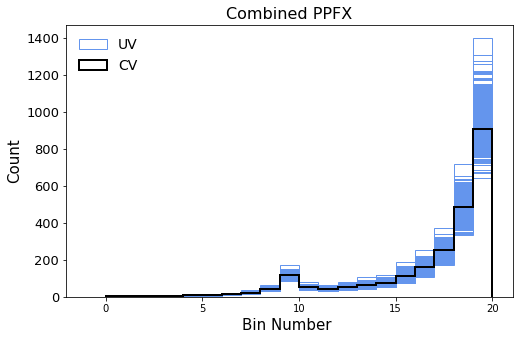

In [69]:
################
####ppfx########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(-0.9, 1.1, 0.2)
bins = np.arange(-1, 1.2, 0.2)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 

zeros = [0]*10

for variation in nue_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0:
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_ppfx_detvar_dict[variation], 
             linewidth=1, color='white', alpha = 0)
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_ppfx_detvar_dict[variation], 
             linewidth=1, color='white', alpha = 0)
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_ppfx_detvar_dict[variation],
             linewidth=1, color='white', alpha = 0)
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_ppfx_detvar_dict[variation],
             linewidth=1, color='white', alpha = 0)
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_ppfx_detvar_dict['CV'], color='white', alpha = 0) 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_ppfx_detvar_dict['CV'], color='white', alpha = 0)

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])

##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Bin Number ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14, loc = "upper left")
#plt.ylim((0,25))

if isCombined == True:
    fig.savefig("batch_ppfx_mc_combSysErr_angleDiff_comb_"+ending+".svg", bbox_inches='tight')

plt.show()

In [70]:
bins = bins_full
print(bins_full)


detsys_fullvars_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[1.8869209124497608, 3.255355416508034, 2.9820830183423617, 6.819017054497941, 8.335619751067338, 9.821754312962046, 13.156555435423947, 22.62317074078949, 41.98559155054562, 118.01053929234618, 52.166391514241695, 42.86156826466322, 52.53750829771161, 65.56141500920057, 77.27426264435053, 114.3228460624814, 163.5009204596281, 251.85777926445007, 482.8525919765234, 907.6765215396881]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 50

In [71]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_18116/1474398876.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_18116/1474398876.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


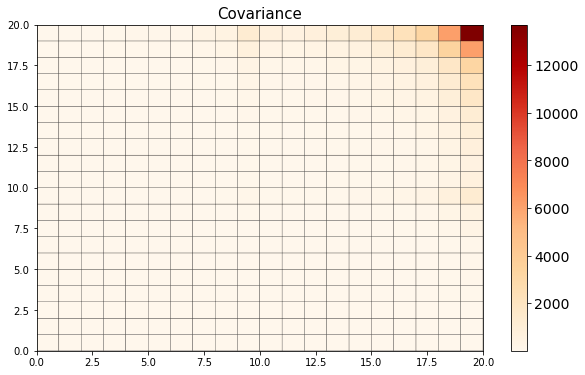

In [72]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]
0      1.886921
1      3.255355
2      2.982083
3      6.819017
4      8.335619
5      9.821754
6     13.156555
7     22.623170
8     41.985589
9    118.010534
Name: CV, dtype: float64
[  1.88692087   3.25535539   2.9820829    6.81901693   8.33561947
   9.82175404  13.15655506  22.6231699   41.98558936 118.01053429
  52.16639151  42.86156826  52.5375083   65.56141501  77.27426264
 114.32284606 163.50092046 251.85777926 482.85259198 907.67652154]
[  1.88692087   3.25535539   2.9820829    6.81901693   8.33561947
   9.82175404  13.15655506  22.6231699   41.98558936 118.01053429
  52.16639151  42.86156826  52.5375083   65.56141501  77.27426264
 114.32284606 163.50092046 251.85777926 482.85259198 907.67652154]


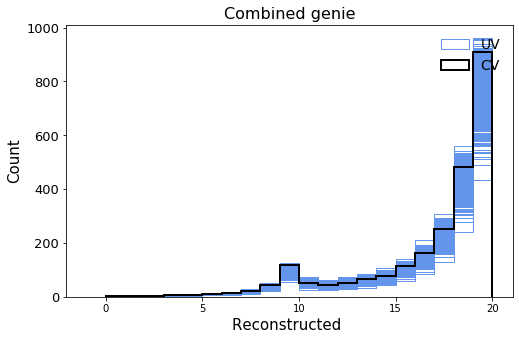

In [73]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(-0.9, 1.1, 0.2)
bins = np.arange(-1, 1.2, 0.2)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 

for variation in numu_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_genie_detvar_dict['CV'], color='white') 
print(nue_genie_detvar_dict['CV'])

numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
print(nue_numu)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])

##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [74]:
bins = bins_full
print(bins_full)


detsys_fullvars_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[1.8869208693504333, 3.2553553879261017, 2.9820829033851624, 6.819016933441162, 8.33561946824193, 9.821754038333893, 13.15655505657196, 22.623169898986816, 41.98558936268091, 118.01053428649902, 52.166391514241695, 42.86156826466322, 52.53750829771161, 65.56141500920057, 77.27426264435053, 114.3228460624814, 163.5009204596281, 251.85777926445007, 482.8525919765234, 907.6765215396881]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 50

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [75]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_18116/765668181.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_18116/765668181.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


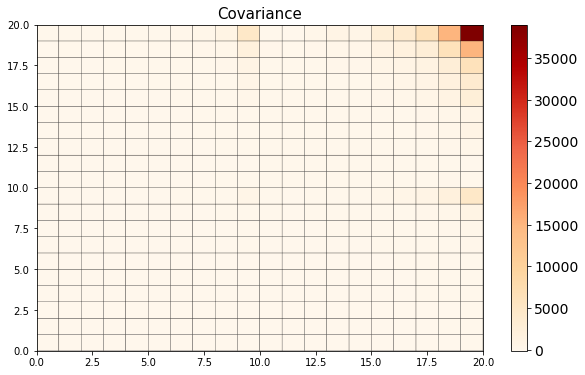

In [76]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]
[  1.88692087   3.25535539   2.9820829    6.81901693   8.33561947
   9.82175404  13.15655506  22.6231699   41.98558936 118.01053429
  52.16639151  42.86156826  52.5375083   65.56141501  77.27426264
 114.32284606 163.50092046 251.85777926 482.85259198 907.67652154]


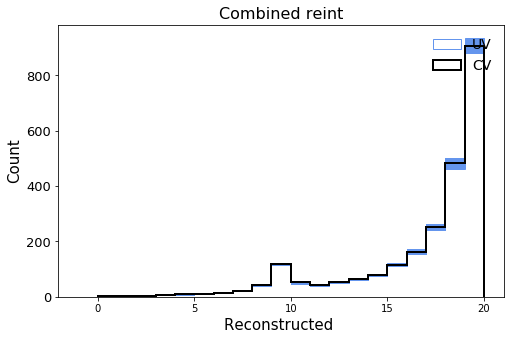

In [77]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(-0.9, 1.1, 0.2)
bins = np.arange(-1, 1.2, 0.2)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 

for variation in nue_mc_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_reint_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_reint_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_reint_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])

##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [78]:
bins = bins_full
print(bins_full)


detsys_fullvars_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

In [79]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_18116/2904819719.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_18116/2904819719.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


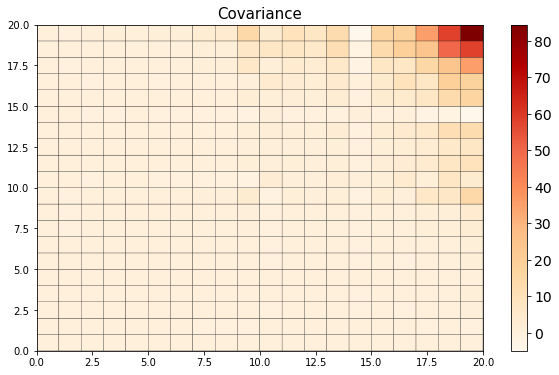

In [80]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]
[  1.88692087   3.25535539   2.9820829    6.81901693   8.33561947
   9.82175404  13.15655506  22.6231699   41.98558936 118.01053429
  52.16639151  42.86156826  52.5375083   65.56141501  77.27426264
 114.32284606 163.50092046 251.85777926 482.85259198 907.67652154]


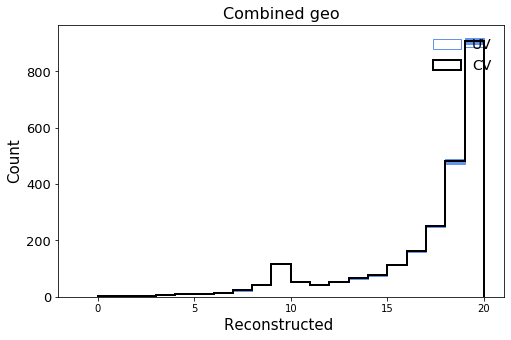

In [81]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(-0.9, 1.1, 0.2)
bins = np.arange(-1, 1.2, 0.2)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 

for variation in nue_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_geo_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_geo_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_geo_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])
print(full[0])

##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [82]:

bins = bins_full
print(bins_full)


detsys_fullvars_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [83]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_18116/9538487.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_18116/9538487.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


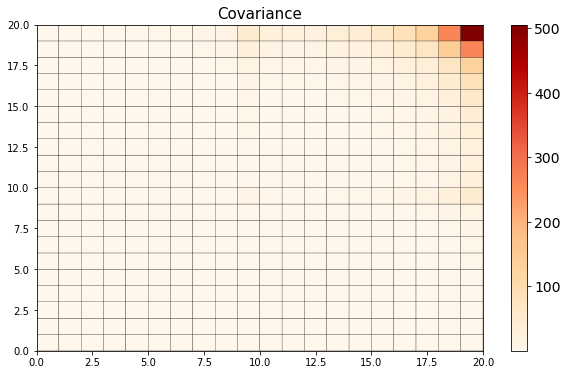

In [84]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

##geo will need different CV values for each one

Dirt Dataframe

Nue Dataframe

Now add everything together

In [85]:
blockwise_cov_genie_only = np.array(detsys_dict_genie['cov'])
print(blockwise_cov_genie_only)
#GENIE NOT GEO

#print(detsys_dict_dirt_genie['cov'])

[[ 1.12541015e-01  1.48068184e-01  1.09394307e-01  3.07725420e-01
   2.97852240e-01  3.81385936e-01  4.74539623e-01  8.09239606e-01
   1.43405281e+00  3.62248685e+00  2.10315500e+00  1.58623996e+00
   1.82558886e+00  2.15999353e+00  2.43783675e+00  3.71948071e+00
   5.51494073e+00  8.22933880e+00  1.54646808e+01  2.73859343e+01]
 [ 1.48068184e-01  2.82167611e-01  1.71156052e-01  4.46029479e-01
   4.11662676e-01  6.20232531e-01  7.23996931e-01  1.21375262e+00
   2.02634650e+00  4.08047788e+00  3.35894295e+00  2.63847131e+00
   2.99780115e+00  3.43430124e+00  3.93496094e+00  5.25489922e+00
   7.54437135e+00  1.07375957e+01  1.92085010e+01  2.78367101e+01]
 [ 1.09394307e-01  1.71156052e-01  1.55012162e-01  3.77710133e-01
   3.56319888e-01  4.93353343e-01  6.30578001e-01  1.02144143e+00
   1.73163435e+00  4.06785915e+00  2.75530792e+00  2.20883877e+00
   2.51243614e+00  2.87854591e+00  3.38108038e+00  4.52084965e+00
   6.82028776e+00  9.72507231e+00  1.78851822e+01  2.93992536e+01]
 [ 3.07

/tmp/ipykernel_18116/1207631039.py:3: RuntimeWarning: invalid value encountered in log
  plt.pcolor(bins, bins, np.log(blockwise_cov_genie_only), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


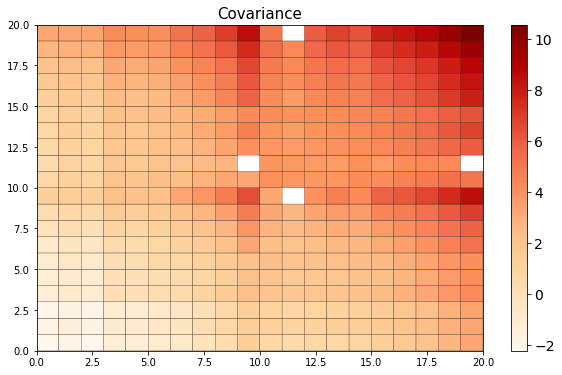

In [86]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, np.log(blockwise_cov_genie_only), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [87]:

if isCombined == False and isRun3 == False:
    np.savetxt("blockwise_cov_genie_only_angle_"+ending+".csv", 
           blockwise_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  
elif isCombined == True:
    np.savetxt("blockwise_cov_genie_only_angle_comb_"+ending+".csv", 
           blockwise_cov_genie_only,
           delimiter =", ", 
           fmt ='% s')  

In [88]:
sys_total_cov = np.array(detsys_dict_ppfx['cov']) + np.array(detsys_dict_genie['cov']) + np.array(detsys_dict_reint['cov']) + np.array(detsys_dict_geo['cov'])

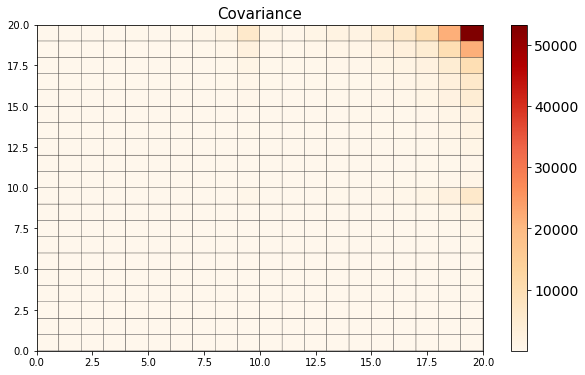

In [89]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, sys_total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [90]:
#nue_cov_mc_stat and numu_cov_mc_stat

nue_stats = np.diag(nue_cov_mc_stat)
numu_stats = np.diag(numu_cov_mc_stat)

nue_numu_stats = np.concatenate((nue_stats, numu_stats), axis=0)

print(nue_numu_stats)

[4.37455200e-01 4.15603631e-01 1.13195427e+00 1.94342386e+00
 1.23750003e+00 1.64368571e+00 1.10820047e+00 1.59530192e+00
 2.33987631e+00 8.57252365e+00 1.32164487e+01 1.04313018e+01
 1.61908149e+01 1.92014541e+01 2.07727438e+01 5.18843765e+01
 6.44065256e+01 9.79176441e+01 1.97845884e+02 4.71716445e+02]


In [91]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [92]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_stats

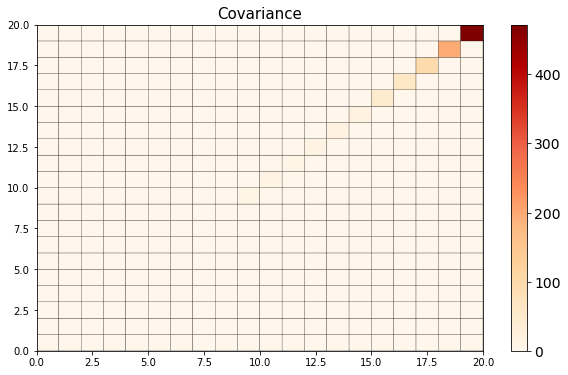

In [93]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [94]:
#make sure these are the flat detsys
nue_detsys = np.diag(nue_cov_mc_detsys)
numu_detsys = np.diag(numu_cov_mc_detsys)

nue_numu_detsys = np.concatenate((np.array(nue_detsys), np.array(numu_detsys)), axis=0)

print(nue_numu_detsys)

[4.72572426e-02 1.03864519e-01 1.49747823e-01 6.26957763e-01
 7.85688370e-01 1.13230901e+00 1.77710533e+00 5.15415337e+00
 1.72771039e+01 1.38513721e+02 1.65295396e+02 1.08610073e+02
 1.74561883e+02 2.57433723e+02 3.68640105e+02 9.00895987e+02
 1.78992264e+03 4.09999380e+03 1.39175157e+04 4.81516079e+04]


In [95]:
nue_numu_cov_detsys   = np.zeros([(len(bins)-1), (len(bins)-1)])

In [96]:
nue_numu_cov_detsys[np.diag_indices_from(nue_numu_cov_detsys)]   = nue_numu_detsys

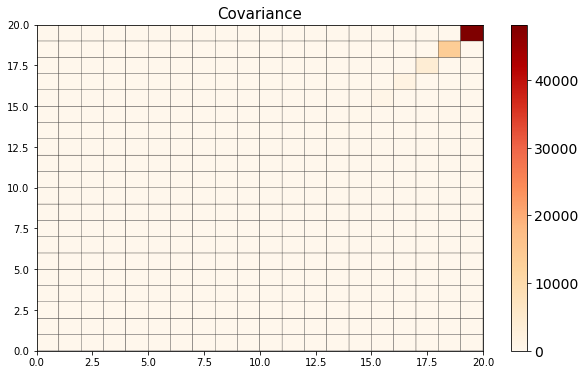

In [97]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_detsys, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


In [98]:
#combined only

addNuWro = True

if addNuWro == True:
    ending = "Jan19"
    
    cov_nuwro = pd.read_csv("nuWro_extra_unisim_uncertainties_angle_comb_"+ending+".csv", header=None)
    cov_nuwro = cov_nuwro.values
    
    ending = "Jan19_AddnuWro"

In [99]:
if addNuWro == False:
    total_cov = sys_total_cov + nue_numu_cov_stats + nue_numu_cov_detsys
elif addNuWro == True:
    total_cov = sys_total_cov + nue_numu_cov_stats + nue_numu_cov_detsys + cov_nuwro


print(np.diag(sys_total_cov))
print("")
print(np.diag(nue_numu_cov_stats))
print("")
print(np.diag(nue_numu_cov_detsys))
print("")
#print(np.diag(cov_nuwro))
print("")
print(np.diag(total_cov))

[1.78493922e-01 7.17099484e-01 3.62674548e-01 2.33160506e+00
 3.11493647e+00 3.74697427e+00 5.67698219e+00 1.84346002e+01
 6.08493712e+01 8.09592974e+02 1.06282914e+02 7.83174305e+01
 1.00952603e+02 1.55932691e+02 2.09706137e+02 5.33731788e+02
 1.03691540e+03 2.30415893e+03 9.91739629e+03 5.33149812e+04]

[4.37455200e-01 4.15603631e-01 1.13195427e+00 1.94342386e+00
 1.23750003e+00 1.64368571e+00 1.10820047e+00 1.59530192e+00
 2.33987631e+00 8.57252365e+00 1.32164487e+01 1.04313018e+01
 1.61908149e+01 1.92014541e+01 2.07727438e+01 5.18843765e+01
 6.44065256e+01 9.79176441e+01 1.97845884e+02 4.71716445e+02]

[4.72572426e-02 1.03864519e-01 1.49747823e-01 6.26957763e-01
 7.85688370e-01 1.13230901e+00 1.77710533e+00 5.15415337e+00
 1.72771039e+01 1.38513721e+02 1.65295396e+02 1.08610073e+02
 1.74561883e+02 2.57433723e+02 3.68640105e+02 9.00895987e+02
 1.78992264e+03 4.09999380e+03 1.39175157e+04 4.81516079e+04]


[3.18635833e+00 2.58728553e+00 1.72513141e+00 5.59204319e+00
 7.36657836e+00 1

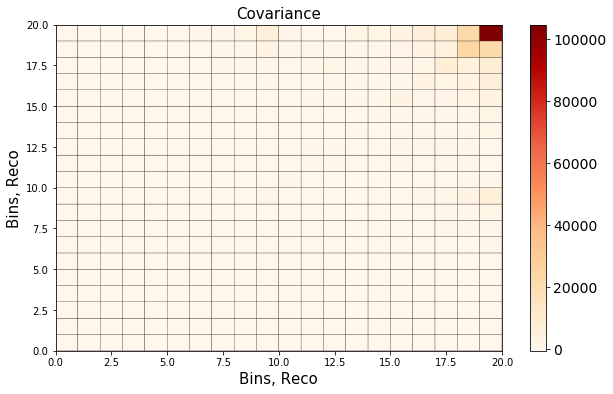

In [100]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 21, 1)
        
plt.pcolor(bins, bins, (total_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

if isCombined == True:
    fig.savefig("cov_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')


In [101]:

if isRun3 == False and isCombined == False:
    np.savetxt("full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_blockwise_recoCut_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_blockwise_recoCut_run3_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    print("Combined")
    np.savetxt("full_500_catsel_nopions_angleDiff_usingSelection_data_covmat_blockwise_recoCut_comb_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s') 

Combined


In [102]:
# compute the corr matrix 

bins = np.arange(0, 21, 1)

total_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(total_cov)): 
    for j in range(len(total_cov[i])): 
        
        if np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]) != 0: 
            total_cor[i][j] = total_cov[i][j] / (np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]))


20


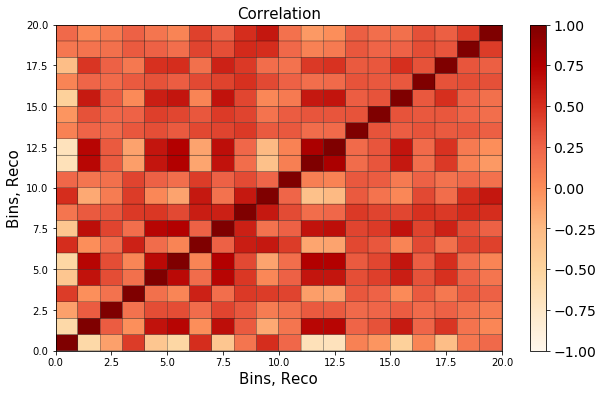

In [103]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


print(len(total_cor))

plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Correlation', fontsize=15)

plt.show()
if isCombined == True:
    fig.savefig("cor_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')


In [104]:
#Get the fractional covariance

#print(total_cov)
top_left_dummy = [ [0]*(10) for x in range(10) ]
top_right_dummy = [ [0]*(10) for x in range(10) ]
bot_left_dummy = [ [0]*(10) for x in range(10) ]
bot_right_dummy = [ [0]*(10) for x in range(10) ]
bot_dummy = np.zeros([10, 20])
top_dummy = np.zeros([10, 20])


#NUE ONLY
bot_left = total_cov[:10]
for i in range(len(bot_left)):
    bot_left_dummy[i] = bot_left[i][:10]
    
nue_errs_bot = np.array(bot_left_dummy)/((n_nue_tot_allsel*n_nue_tot_allsel))
    
#MIX   
bot_right = total_cov[:10]
for i in range(len(bot_right)):
    bot_right_dummy[i] = bot_right[i][10:]
    
mix_errs_bot = np.array(bot_right_dummy)/((n_nue_tot_allsel*n_numu_tot_allsel))

    
#MIX
top_left = total_cov[10:]
for i in range(len(top_left)):
    top_left_dummy[i] = top_left[i][:10]
    
mix_errs_top = np.array(top_left_dummy)/((n_nue_tot_allsel*n_numu_tot_allsel))

#NUMU ONLY
top_right = total_cov[10:]
for i in range(len(top_right)):
    top_right_dummy[i] = top_right[i][10:]
    
numu_errs_top = np.array(top_right_dummy)/((n_numu_tot_allsel*n_numu_tot_allsel))

print((n_nue_tot_allsel*n_numu_tot_allsel))
print(bot_right_dummy[1])
print(mix_errs_bot[1])
print(mix_errs_top[1])

##########################################

for a in range(len(nue_errs_bot)):
    bot_dummy[a] = list(np.concatenate(((nue_errs_bot[a]), mix_errs_bot[a]), axis=0))

    
for a in range(len(numu_errs_top)):
    top_dummy[a] = list(np.concatenate((mix_errs_top[a], ((numu_errs_top[a]))), axis=0))  
    

total_frac_cov = list(bot_dummy) + list(top_dummy)

[   118.61849647    142.5464834     216.99154663    539.1873681
    722.29448872   1355.52539043   2393.65504471   6169.6157628
  20811.53820395 109607.34120602]
[ 4.07702311 27.81823272 35.23189268  8.57257142 13.59121349 48.60805408
 21.6418995  67.26593822 39.70751568 21.0418248 ]
[3.43708884e-02 1.95152010e-01 1.62365277e-01 1.58990583e-02
 1.88167205e-02 3.58591985e-02 9.04136105e-03 1.09027759e-02
 1.90795679e-03 1.91974594e-04]
[-0.24167464  0.19515201  0.04453562 -0.00914357  0.05818748  0.04918537
 -0.00419167  0.0156279   0.00208481 -0.00239508]


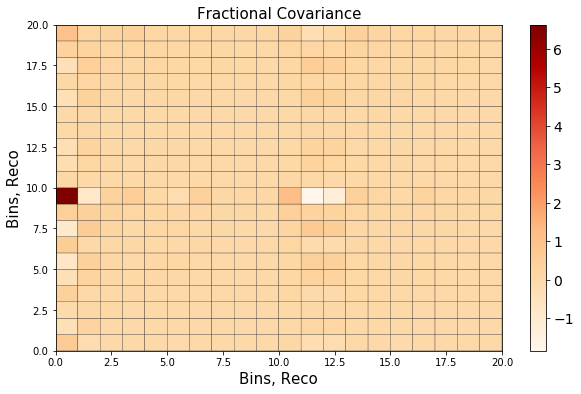

In [105]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, total_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Reco', fontsize=15)

plt.title('Fractional Covariance', fontsize=15)

plt.show()

if isCombined == True:
    fig.savefig("fraccov_input_angleDiff_comb_"+ending+".svg", bbox_inches='tight')


## Smearing

In [3]:
import csv

ending = "Jan19"

print("isRun3 = ", isRun3, "  isCombined = ", isCombined)

if isRun3 == False and isCombined == False:
    with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_smearcept_weighted_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_smearing = list(csv_reader)
elif isCombined == True:
    with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_smearcept_weighted_recoCut_comb_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_smearing = list(csv_reader)

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(nue_smearing[a])
    for b in range(len(nue_smearing[a])):
        nue_smearing[a][b] = float(nue_smearing[a][b])
    
print("nue_smearing = ", nue_smearing)

isRun3 =  False   isCombined =  False
nue_smearing =  [[0.025850717326656697, 0.0060025599855898564, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0026646595601359027, 0.039325791251546734, 0.00522948971257967, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.007302724498319967, 0.04559878216629125, 0.0062834718436272675, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.005882047533909733, 0.04837510094825193, 0.007571958924022988, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.008872370100244739, 0.07164984641349309, 0.004246867081176065, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.008240999736924371, 0.08009235819241749, 0.007002616596193986, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0078067952606822215, 0.09013923579940966, 0.00701741433431969, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009685461035451877, 0.09683316210890323, 0.005235469676305391, 4.462511443342142e-05], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014736212333210812, 0.12782587251258057, 0.002470546111482989], [0.0, 0.0, 0.000622282

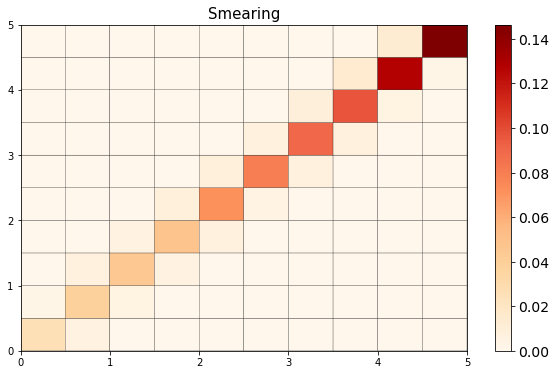

In [4]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 5.5, 0.5)
        
plt.pcolor(bins, bins, nue_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [5]:
if isRun3 == False and isCombined == False:
    with open('numu_full_500_catsel_nopions_angleDiff_usingSelection_smearcept_weighted_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_smearing = list(csv_reader)
elif isCombined == True:
    with open('numu_full_500_catsel_nopions_angleDiff_usingSelection_smearcept_weighted_recoCut_comb_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_smearing = list(csv_reader)

for a in range(len(numu_smearing)):
    numu_smearing[a] = list(numu_smearing[a])
    for b in range(len(numu_smearing[a])):
        numu_smearing[a][b] = float(numu_smearing[a][b])
    
print("numu_smearing = ", numu_smearing)

numu_smearing =  [[0.03516819632584856, 0.0027004575780994883, 0.00023824741118534952, 0.000905961055486852, 0.00021763127174076366, 0.0002643877928593277, 0.0, 0.0, 8.667240209882345e-05, 0.00019089995202661137], [0.001817477534460747, 0.02478800163268525, 0.003417529845406618, 0.00022963969469370904, 0.0, 9.002970662103682e-05, 0.0, 0.0, 5.598005069674138e-05, 0.0], [0.0, 0.0011537972864873113, 0.034510770719204255, 0.002195862850541416, 0.0, 0.0, 0.00044713330487042687, 0.00016848189839312837, 9.782068458562839e-05, 0.0], [0.00037730612945384814, 0.0004330468275580219, 0.0045454493064412535, 0.03756780661930271, 0.003904849220088535, 0.0005132907713351736, 0.00013606624646277798, 0.00015173049415897065, 0.0, 7.330968745833543e-05], [0.0, 0.0, 0.0001803326459304863, 0.005455963790926055, 0.042187572492641136, 0.003804501027540492, 0.0003162702703568849, 5.842271793778173e-05, 6.020427375916806e-05, 0.0], [0.0, 0.0, 0.0, 0.0, 0.005247029507069923, 0.03861451301307974, 0.00478581337530

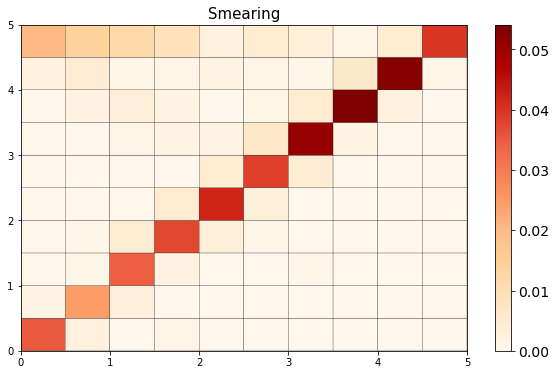

In [6]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 5.5, 0.5)
        
plt.pcolor(bins, bins, numu_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [7]:
#nue_smearing#

zeros = [0]*10

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(np.concatenate(((nue_smearing[a]), zeros), axis=0))

    
for a in range(len(numu_smearing)):
    numu_smearing[a] = list(np.concatenate((zeros, ((numu_smearing[a]))), axis=0)) 

In [8]:
full_smear = nue_smearing + numu_smearing
print(nue_smearing)

[[0.025850717326656697, 0.0060025599855898564, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0026646595601359027, 0.039325791251546734, 0.00522948971257967, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.007302724498319967, 0.04559878216629125, 0.0062834718436272675, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.005882047533909733, 0.04837510094825193, 0.007571958924022988, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.008872370100244739, 0.07164984641349309, 0.004246867081176065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.008240999736924371, 0.08009235819241749, 0.007002616596193986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0078067952606822215, 0.09013923579940966, 0.00701741433431969, 0.0, 0.0,

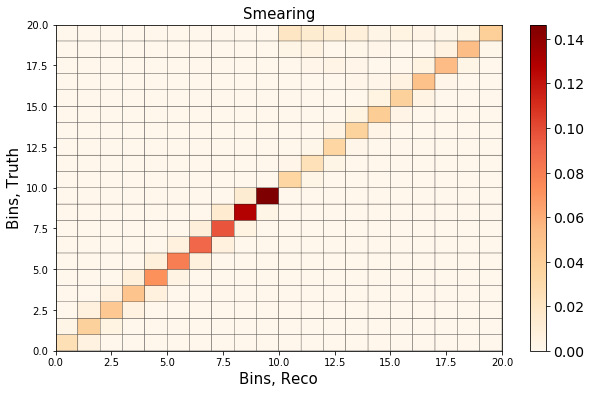

In [9]:
fig = plt.figure(figsize=(10, 6))

bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
        
plt.pcolor(bins_full, bins_full, full_smear, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Smearing', fontsize=15)

if isCombined == True:
    fig.savefig("full_blockwise_smearing_input_angleDiff_"+ending+".svg",bbox_inches='tight' )

plt.show()

/tmp/ipykernel_8186/3430785336.py:6: RuntimeWarning: divide by zero encountered in log
  plt.pcolor(bins_full, bins_full, np.log(full_smear), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)


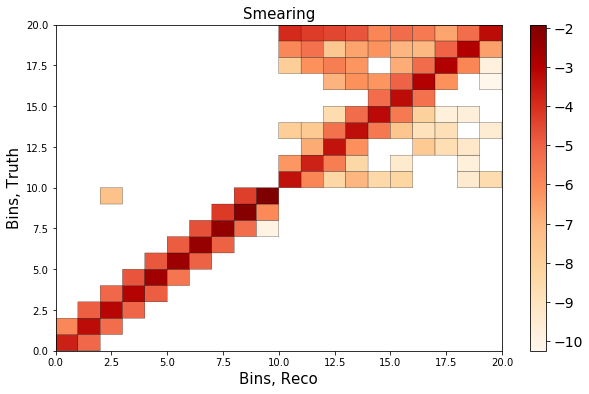

In [10]:
fig = plt.figure(figsize=(10, 6))

bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
        
plt.pcolor(bins_full, bins_full, np.log(full_smear), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Smearing', fontsize=15)

if isCombined == True:
    fig.savefig("full_blockwise_smearing_input_angleDiff_"+ending+".svg",bbox_inches='tight' )

plt.show()

In [15]:
if isRun3 == False and isCombined == False:
    print("Run1")
    np.savetxt("full_500_catsel_nopions_angleDiff_usingSelection_smearcept_weighted_blockwise_recoCut_run1_"+ending+".csv", 
               full_smear,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    print("Combined")
    np.savetxt("full_500_catsel_nopions_angleDiff_usingSelection_smearcept_weighted_blockwise_recoCut_"+ending+".csv", 
               full_smear,
               delimiter =", ", 
               fmt ='% s')

Run1


In [16]:
if isCombined == True:
    with open("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv") as file:
        content = file.readlines()
        mcsig = content[0:]

        for i in range(20):
            mcsig[i]=mcsig[i].rstrip().rstrip(',')
            mcsig[i] = float(mcsig[i])

        print("MC Signal: ")
        print(mcsig)
    
elif isCombined == False and isRun3 == False:
    with open("nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv") as file:
        content = file.readlines()
        mcsig = content[0:]

        for i in range(20):
            mcsig[i]=mcsig[i].rstrip().rstrip(',')
            mcsig[i] = float(mcsig[i])

        print("MC Signal: ")
        print(mcsig)
            
if isCombined == True:               
    with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
        content = file.readlines()
        prior_true = content[0:]

        for i in range(20):
            prior_true[i]=prior_true[i].rstrip().rstrip(',')
            prior_true[i] = float(prior_true[i])

        print("Prior Truth: ")
        print(prior_true)
elif isCombined == False and isRun3 == False:
    with open('nue_full_500_catsel_nopions_angleDiff_usingSelection_prior_true_signal_blockwise_recoCut_'+ending+'.csv') as file:
        content = file.readlines()
        prior_true = content[0:]

        for i in range(20):
            prior_true[i]=prior_true[i].rstrip().rstrip(',')
            prior_true[i] = float(prior_true[i])

        print("Prior Truth: ")
        print(prior_true)
        
print("------------------------------------------")
print("SMEAR x PRIOR_TRUE")
made_data_sig = np.dot(full_smear, prior_true)
print(made_data_sig)
print(sum(made_data_sig))
print("")
print("MC DATA SIGNAL")
print(mcsig)
print(sum(mcsig))
print("")
print("-------------------------------------------")
print("DIFFERENCES")
diffs = made_data_sig - mcsig

for i in range(20):
    print(diffs[i])

FileNotFoundError: [Errno 2] No such file or directory: 'nue_full_500_catsel_nopions_angleDiff_usingSelection_data_signal_MCONLY_blockwise_recoCut_Jan19.csv'

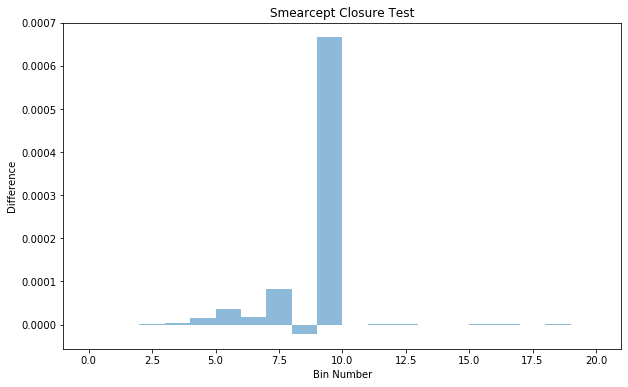

In [142]:
import random
import numpy
from matplotlib import pyplot

fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 21, 1)
count = [0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, 10.1, 11.1, 12.1, 13.1, \
        14.1, 15.1, 16.1, 17.1, 18.1, 19.1]

pyplot.hist(count, bins, weights=diffs, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("Smearcept Closure Test")
pyplot.show()

if isCombined == True:
    fig.savefig("smearcept_closure_test_angleDiff_"+ending+".svg",bbox_inches='tight' )